This notebook is an exploration of data where an anonymised group of people have answered a number of questions about:

- how well they know each other student (scale from 1 = don't know them, to 5 = we're best friends)
- their student experiences (scale from 1 = I didn't think about doing it, to 5 = I do it almost every day)
- their personality traits (scale from 1 = Not like me at all, to 7 = A lot like me)

Data in the file looks like this: unique name, personality questions, experience qiestions, familiarity with other students

```
What is your name?,"Anxious, easily upset","Calm, emotionally stable","Conventional, uncreative","Critical, quarrelsome","Dependable, self-disciplined","Open to new experiences, complex","Disorganized, careless","Extraverted, enthusiastic","Sympathetic, warm","Reserved, quiet",

Cooked a meal with others,Climbed Arthur's Seat,Cycled,Danced to the music with others,Go to Commonwealth Swimming pool,Go to the university gym (pleasance),Learned some words in a completely new language,Made new friends for life,Performed in a team sports,Read a fiction book,Saw a long-haired ginger Scottish cow,Spoke to a person born in Edinburgh,Tried eating haggis,Visited Botanic Gardens,Visited Castle,Walk around the meadows,Went out for a meal with friends,Went to the cinema,Went to the Student Union,Went to the university library,

p0,p1,p10,p11,p12,p13,p14,p15,p16,p17,p18,p19,p2,p20,p21,p22,p23,p24,p25,p26,p27,p28,p29,p3,p4,p5,p6,p7,p8,p9
```
then each row of data will look like this:

```
p0,6,5,2,2,5,7,2,5,5,4,1,1,1,1,0,0,1,1,1,1,1,1,0,1,0,1,1,1,1,1,5,4,3,2,3,3,3,3,3,4,3,4,3,5,3,3,3,3,3,3,1,4,3,4,4,3,3,4,4,1
p1,5,2,5,5,7,7,5,7,7,1,1,1,0,1,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,1,5,1,5,2,1,2,2,4,5,5,1,4,5,5,5,2,5,1,3,5,5,5,5,5,2,4,4,4,5,5
```

We will draw some graphs and look at some simple connections between things.

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint as pp

import matplotlib.pyplot as plt




In [2]:
personality_questions  = ["Anxious, easily upset", 
                        "Calm, emotionally stable",
                        "Conventional, uncreative",
                        "Critical, quarrelsome", 
                        "Dependable, self-disciplined",
                        "Open to new experiences, complex",
                        "Disorganized, careless",
                        "Extraverted, enthusiastic",
                        "Sympathetic, warm",
                        "Reserved, quiet"]

experiences_questions = [        "Go to Commonwealth Swimming pool", "Climbed Arthur's Seat",  "Cooked a meal with others", 
       "Go to the university gym (pleasance)", "Danced to the music with others", 
       "Learned some words in a completely new language",
       "Made new friends for life","Cycled",
       "Performed in a team sports",  "Read a fiction book", 
        "Saw a long-haired ginger Scottish cow",
       "Spoke to a person born in Edinburgh", 
        "Tried eating haggis", 
       "Visited Botanic Gardens", "Visited Castle", 
       "Walk around the meadows",
       "Went out for a meal with friends", "Went to the Student Union",
       "Went to the cinema", "Went to the university library",
       ]

In [3]:
df = pd.read_csv('graph_large.csv', index_col = 0)
print(df)

                    Anxious, easily upset  Calm, emotionally stable  \
What is your name?                                                    
p0                                      6                         5   
p1                                      5                         2   
p10                                     6                         3   
p11                                     3                         3   
p12                                     5                         5   
p13                                     6                         6   
p14                                     3                         7   
p15                                     5                         6   
p16                                     5                         3   
p17                                     5                         5   
p18                                     2                         3   
p19                                     5                         4   
p2    

In [4]:
people = df.index.values.tolist()

DG = nx.DiGraph()
plt.rcParams['figure.figsize'] = [15, 15]
for row, row_values in df.iterrows():
    print('\nNode: ', row)
    for column, column_values in enumerate(row_values):
        #### optional: only keep connections >3
        isThisAPersonColumn = df.columns[column] in people
        if(column_values > 3 and isThisAPersonColumn): # only connect nodes if this is a 'person' column
            print('Connected to ', df.columns[column], ' with weight: ', column_values)
            DG.add_edge(row, df.columns[column], weight=column_values)
    


Node:  p0
Connected to  p0  with weight:  5
Connected to  p1  with weight:  4
Connected to  p17  with weight:  4
Connected to  p19  with weight:  4
Connected to  p20  with weight:  5
Connected to  p28  with weight:  4
Connected to  p3  with weight:  4
Connected to  p4  with weight:  4
Connected to  p7  with weight:  4
Connected to  p8  with weight:  4

Node:  p1
Connected to  p0  with weight:  5
Connected to  p10  with weight:  5
Connected to  p15  with weight:  4
Connected to  p16  with weight:  5
Connected to  p17  with weight:  5
Connected to  p19  with weight:  4
Connected to  p2  with weight:  5
Connected to  p20  with weight:  5
Connected to  p21  with weight:  5
Connected to  p23  with weight:  5
Connected to  p26  with weight:  5
Connected to  p27  with weight:  5
Connected to  p28  with weight:  5
Connected to  p29  with weight:  5
Connected to  p3  with weight:  5
Connected to  p5  with weight:  4
Connected to  p6  with weight:  4
Connected to  p7  with weight:  4
Connected 

In [5]:
degree = nx.degree_centrality(DG)
betweenness = nx.betweenness_centrality(DG)
pagerank = nx.pagerank(DG)
hits = nx.hits(DG)

print('degree')
pp.pprint(degree)
print('betweenness')
pp.pprint(betweenness)
print('pagerank')
pp.pprint(pagerank)
print('hits[0]')
pp.pprint(hits[0])
print('hits[1]')
pp.pprint(hits[1])

degree
{'p0': 1.0344827586206897,
 'p1': 1.3448275862068966,
 'p10': 1.5517241379310345,
 'p11': 0.06896551724137931,
 'p12': 0.13793103448275862,
 'p13': 0.27586206896551724,
 'p14': 0.7241379310344828,
 'p15': 0.7586206896551724,
 'p16': 0.9655172413793103,
 'p17': 0.7586206896551724,
 'p18': 0.9310344827586207,
 'p19': 0.896551724137931,
 'p2': 0.4482758620689655,
 'p20': 1.2413793103448276,
 'p21': 0.7586206896551724,
 'p22': 0.20689655172413793,
 'p23': 1.1724137931034482,
 'p24': 0.13793103448275862,
 'p25': 0.896551724137931,
 'p26': 1.0,
 'p27': 1.4137931034482758,
 'p28': 1.5172413793103448,
 'p29': 1.1379310344827587,
 'p3': 1.1724137931034482,
 'p4': 1.0,
 'p5': 0.9655172413793103,
 'p6': 1.4482758620689655,
 'p7': 1.1724137931034482,
 'p8': 1.0,
 'p9': 0.7586206896551724}
betweenness
{'p0': 0.04172488021010188,
 'p1': 0.06437917585859897,
 'p10': 0.07515397096673948,
 'p11': 0.0,
 'p12': 0.0,
 'p13': 0.0,
 'p14': 0.0021760629425546965,
 'p15': 0.011805254816338559,
 'p16': 

In [6]:
# Note: we will reuse the same spring layout thoughout the graphs
pos = nx.spring_layout(DG)

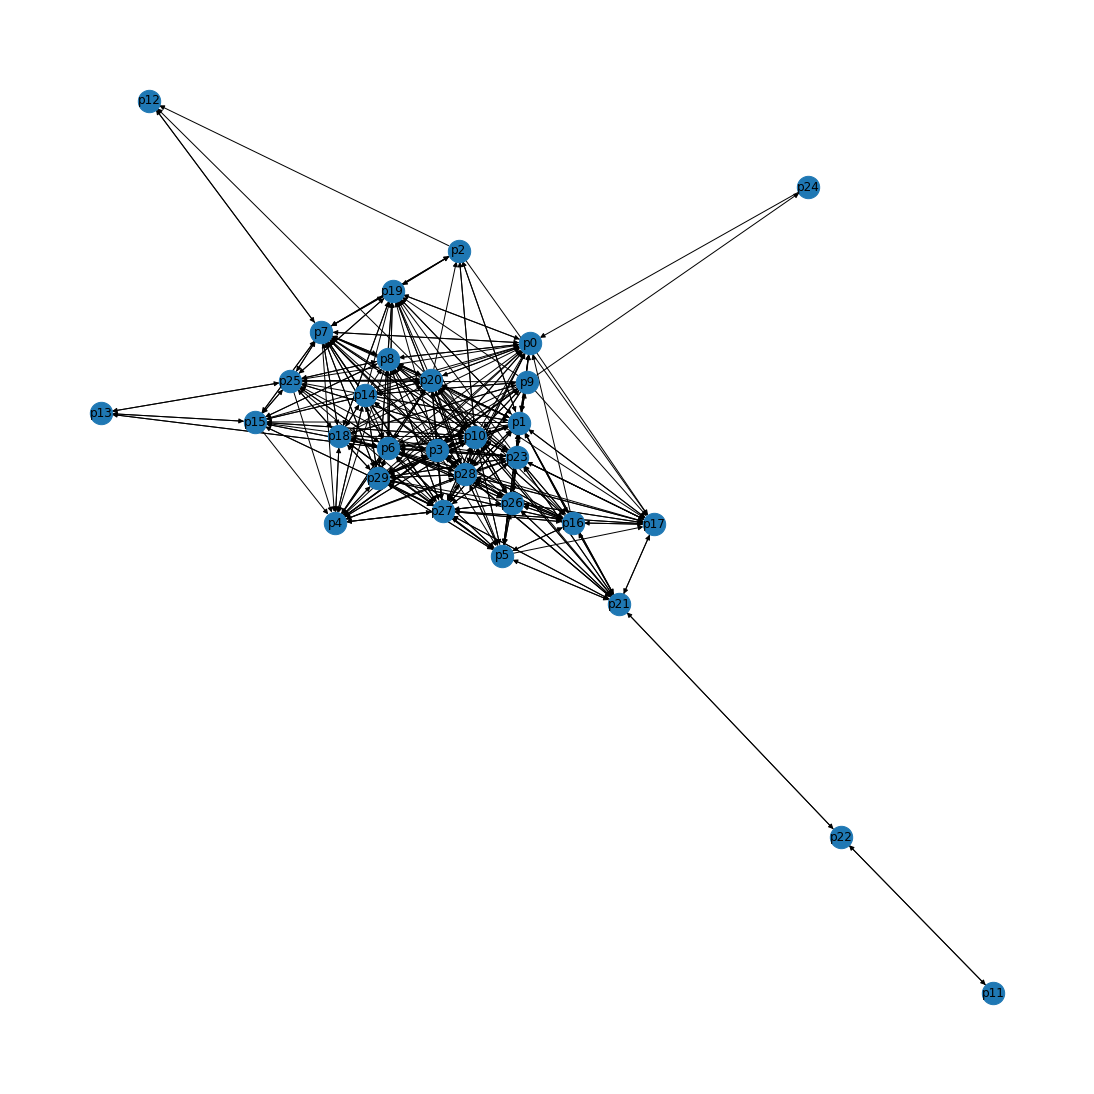

In [7]:
nx.draw(DG, pos, with_labels= True, node_size = 500)
plt.show()

### Metrics

In [8]:
degree = nx.degree_centrality(DG)
betweenness = nx.betweenness_centrality(DG)
pagerank = nx.pagerank_numpy(DG)
hits = nx.hits_numpy(DG)

{'p0': 1.0344827586206897,
 'p1': 1.3448275862068966,
 'p10': 1.5517241379310345,
 'p11': 0.06896551724137931,
 'p12': 0.13793103448275862,
 'p13': 0.27586206896551724,
 'p14': 0.7241379310344828,
 'p15': 0.7586206896551724,
 'p16': 0.9655172413793103,
 'p17': 0.7586206896551724,
 'p18': 0.9310344827586207,
 'p19': 0.896551724137931,
 'p2': 0.4482758620689655,
 'p20': 1.2413793103448276,
 'p21': 0.7586206896551724,
 'p22': 0.20689655172413793,
 'p23': 1.1724137931034482,
 'p24': 0.13793103448275862,
 'p25': 0.896551724137931,
 'p26': 1.0,
 'p27': 1.4137931034482758,
 'p28': 1.5172413793103448,
 'p29': 1.1379310344827587,
 'p3': 1.1724137931034482,
 'p4': 1.0,
 'p5': 0.9655172413793103,
 'p6': 1.4482758620689655,
 'p7': 1.1724137931034482,
 'p8': 1.0,
 'p9': 0.7586206896551724}


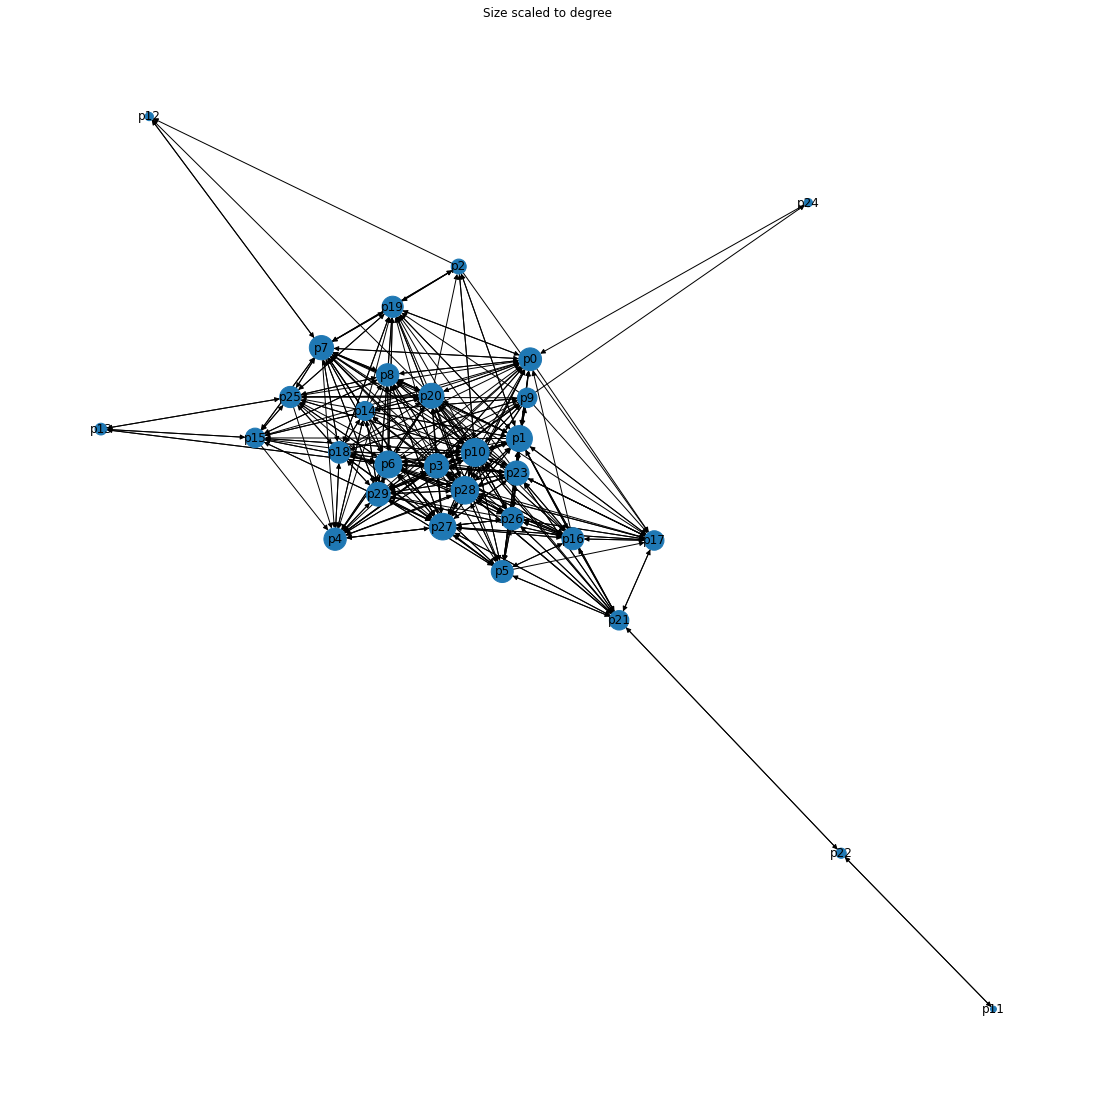

In [9]:
pp.pprint(degree)

# pos = nx.spring_layout(DG)

size = [value * 500 for value in degree.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to degree")
plt.show()

{'p0': 0.04172488021010188,
 'p1': 0.06437917585859897,
 'p10': 0.07515397096673948,
 'p11': 0.0,
 'p12': 0.0,
 'p13': 0.0,
 'p14': 0.0021760629425546965,
 'p15': 0.011805254816338559,
 'p16': 0.005592935872202752,
 'p17': 0.008546063409689894,
 'p18': 0.014374321806320093,
 'p19': 0.01090500304433254,
 'p2': 0.003644096319187345,
 'p20': 0.04075413209076418,
 'p21': 0.13336555685693616,
 'p22': 0.06896551724137931,
 'p23': 0.017236656136612672,
 'p24': 0.00010262725779967159,
 'p25': 0.020189313585525143,
 'p26': 0.008973326691017216,
 'p27': 0.03555699731201791,
 'p28': 0.059856214125179955,
 'p29': 0.012304684662925185,
 'p3': 0.02289984539088454,
 'p4': 0.024145812179762638,
 'p5': 0.008361014810232428,
 'p6': 0.060276007575073384,
 'p7': 0.07087677979283123,
 'p8': 0.007335739938608673,
 'p9': 0.0374930829980091}


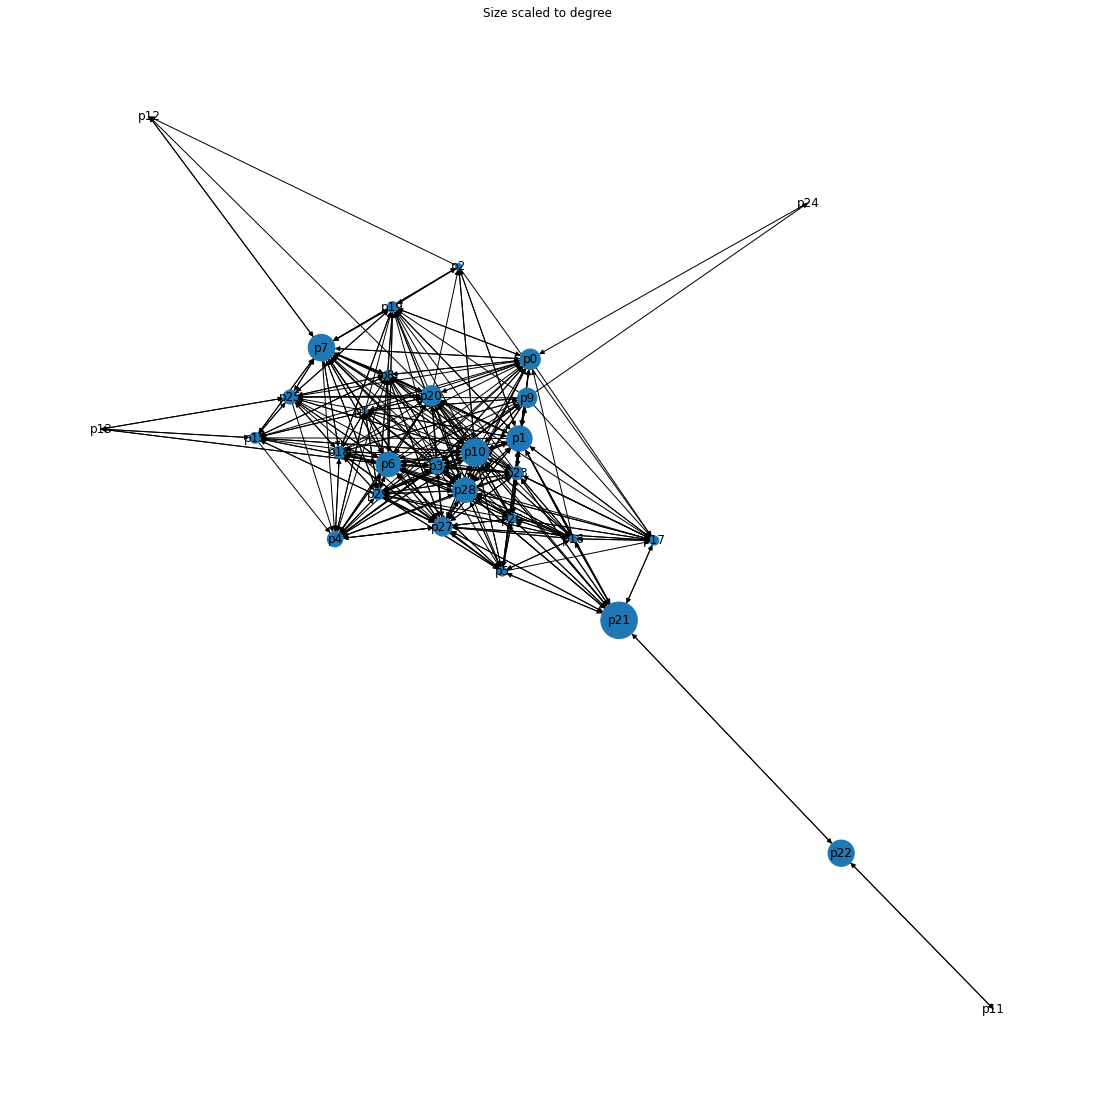

In [10]:
pp.pprint(betweenness)

# pos = nx.spring_layout(DG)

size = [value * 10000 for value in betweenness.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to degree")
plt.show()

{'p0': 0.04779932900127543,
 'p1': 0.045224436425308316,
 'p10': 0.05282016140823306,
 'p11': 0.012471711947533572,
 'p12': 0.012202079998096721,
 'p13': 0.01476396950793853,
 'p14': 0.01623361000827233,
 'p15': 0.029244089017426627,
 'p16': 0.03538031622261725,
 'p17': 0.035685645153923425,
 'p18': 0.02783217969877836,
 'p19': 0.03796476901857451,
 'p2': 0.021198152724603948,
 'p20': 0.04027747753861491,
 'p21': 0.03569687613419865,
 'p22': 0.026370748050118468,
 'p23': 0.036273626337537536,
 'p24': 0.011207882236534815,
 'p25': 0.03185672357979725,
 'p26': 0.033771019631874774,
 'p27': 0.04898200172879512,
 'p28': 0.05245270934279992,
 'p29': 0.03549918950167086,
 'p3': 0.030977501073118953,
 'p4': 0.0411372718226954,
 'p5': 0.03205959116275208,
 'p6': 0.05079090568939104,
 'p7': 0.05054021628999657,
 'p8': 0.035518780951648565,
 'p9': 0.017767028795872854}


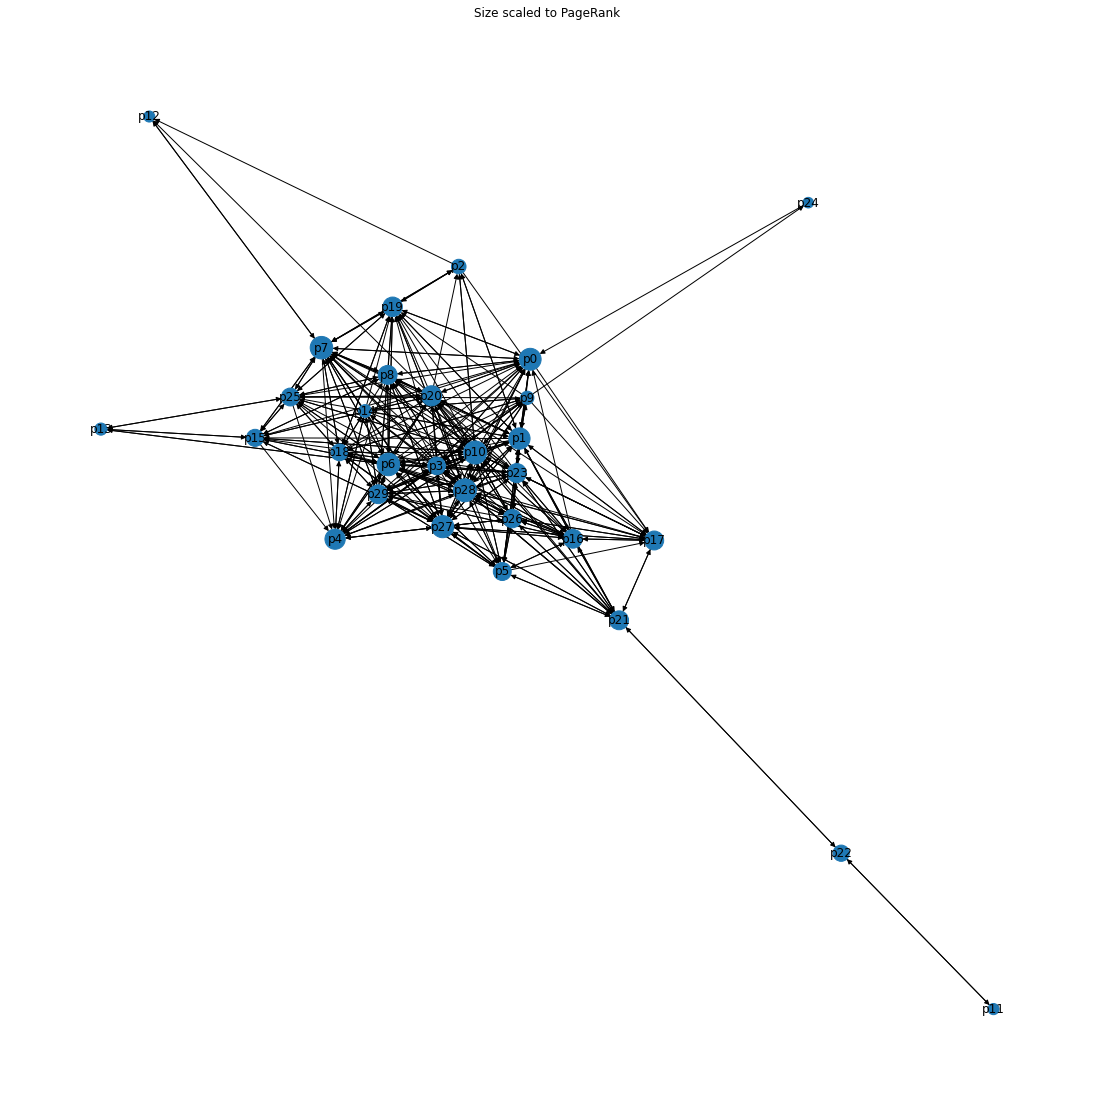

In [11]:
pp.pprint(pagerank)

# pos = nx.spring_layout(DG)

size = [value * 10000 for value in pagerank.values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to PageRank")
plt.show()

{'p0': 0.025962317513574522,
 'p1': 0.05496234296994012,
 'p10': 0.05500939481141112,
 'p11': 0.00014478900423844828,
 'p12': 0.00249346927715326,
 'p13': 0.008626042475364708,
 'p14': 0.03599972244648074,
 'p15': 0.027721243759766017,
 'p16': 0.03908599241262639,
 'p17': 0.020879668999413604,
 'p18': 0.03856189901838351,
 'p19': 0.021182789201480003,
 'p2': 0.01405622549841308,
 'p20': 0.04967712870468099,
 'p21': 0.026735093099611702,
 'p22': 0.0025157465954898247,
 'p23': 0.05481262333006834,
 'p24': 0.002825552005333875,
 'p25': 0.034499260059404985,
 'p26': 0.04563660550134803,
 'p27': 0.054858748441490524,
 'p28': 0.057047055984577225,
 'p29': 0.04669576047127364,
 'p3': 0.05043839471346281,
 'p4': 0.02838363595241866,
 'p5': 0.03691257972734677,
 'p6': 0.05665420118745401,
 'p7': 0.034518483539043646,
 'p8': 0.03813839674882969,
 'p9': 0.034964836549919706}


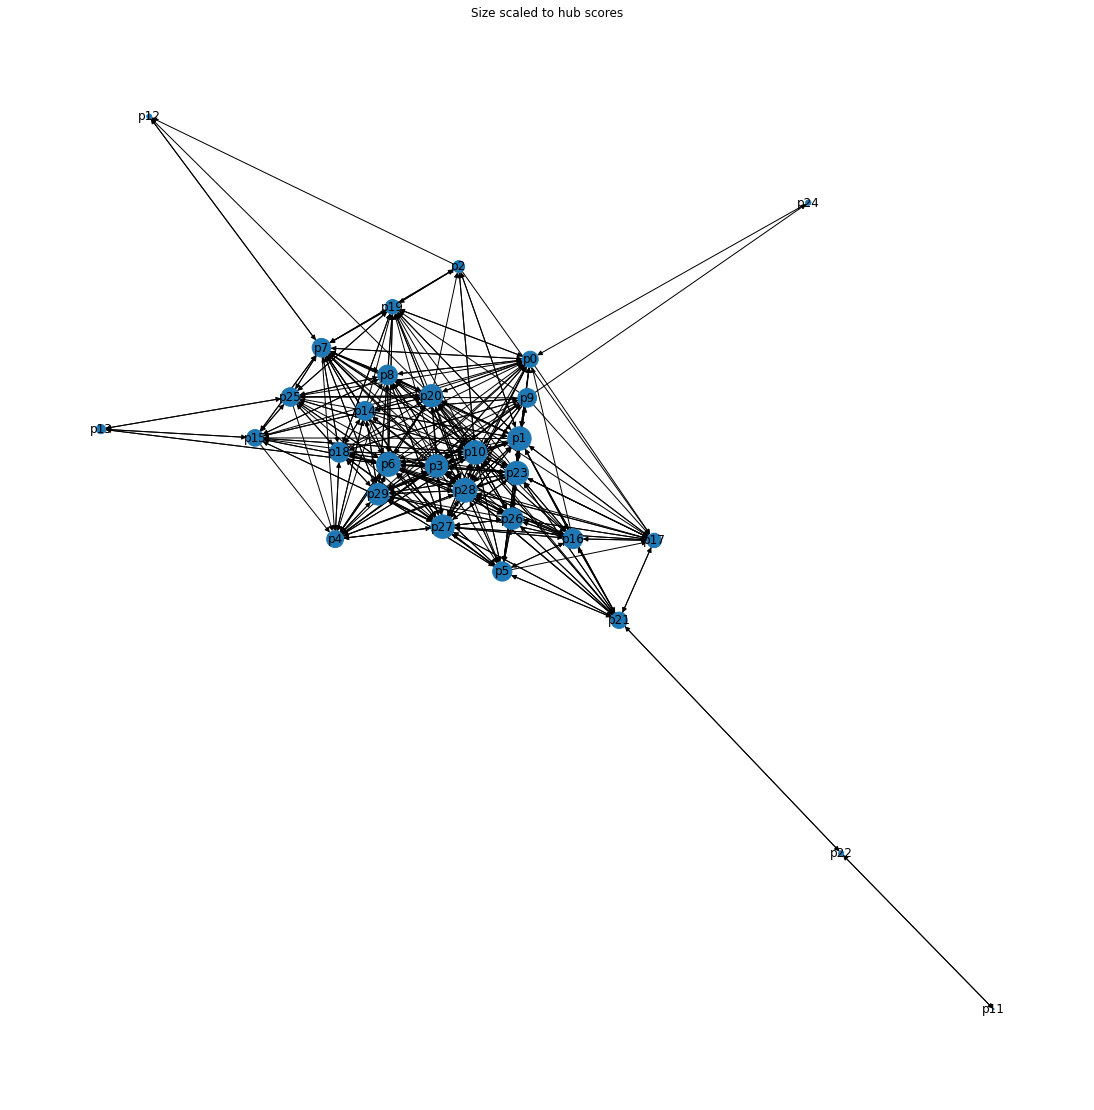

In [12]:
pp.pprint(hits[0])

# pos = nx.spring_layout(DG)

size = [value * 10000 for value in hits[0].values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to hub scores")
plt.show()

{'p0': 0.047247245532321035,
 'p1': 0.04432105271782845,
 'p10': 0.05830242251178969,
 'p11': 0.0001751651856752991,
 'p12': 0.006164604115259621,
 'p13': 0.008088622045179756,
 'p14': 0.01725829074642675,
 'p15': 0.02938208875183391,
 'p16': 0.041351347896983734,
 'p17': 0.03844108159898689,
 'p18': 0.025565978196717493,
 'p19': 0.03894148536973714,
 'p2': 0.014515182757965785,
 'p20': 0.043757820626172964,
 'p21': 0.03334080981621776,
 'p22': 0.0020467445999502554,
 'p23': 0.04158588393628002,
 'p24': 0.0021443479325061747,
 'p25': 0.02843196716220175,
 'p26': 0.03875030005922013,
 'p27': 0.05586585093981798,
 'p28': 0.05542738770528799,
 'p29': 0.04448826712308783,
 'p3': 0.03562837228195859,
 'p4': 0.04692918631488853,
 'p5': 0.04119924810836931,
 'p6': 0.056035489571229856,
 'p7': 0.044059757895621415,
 'p8': 0.041251115761919956,
 'p9': 0.01930288273856393}


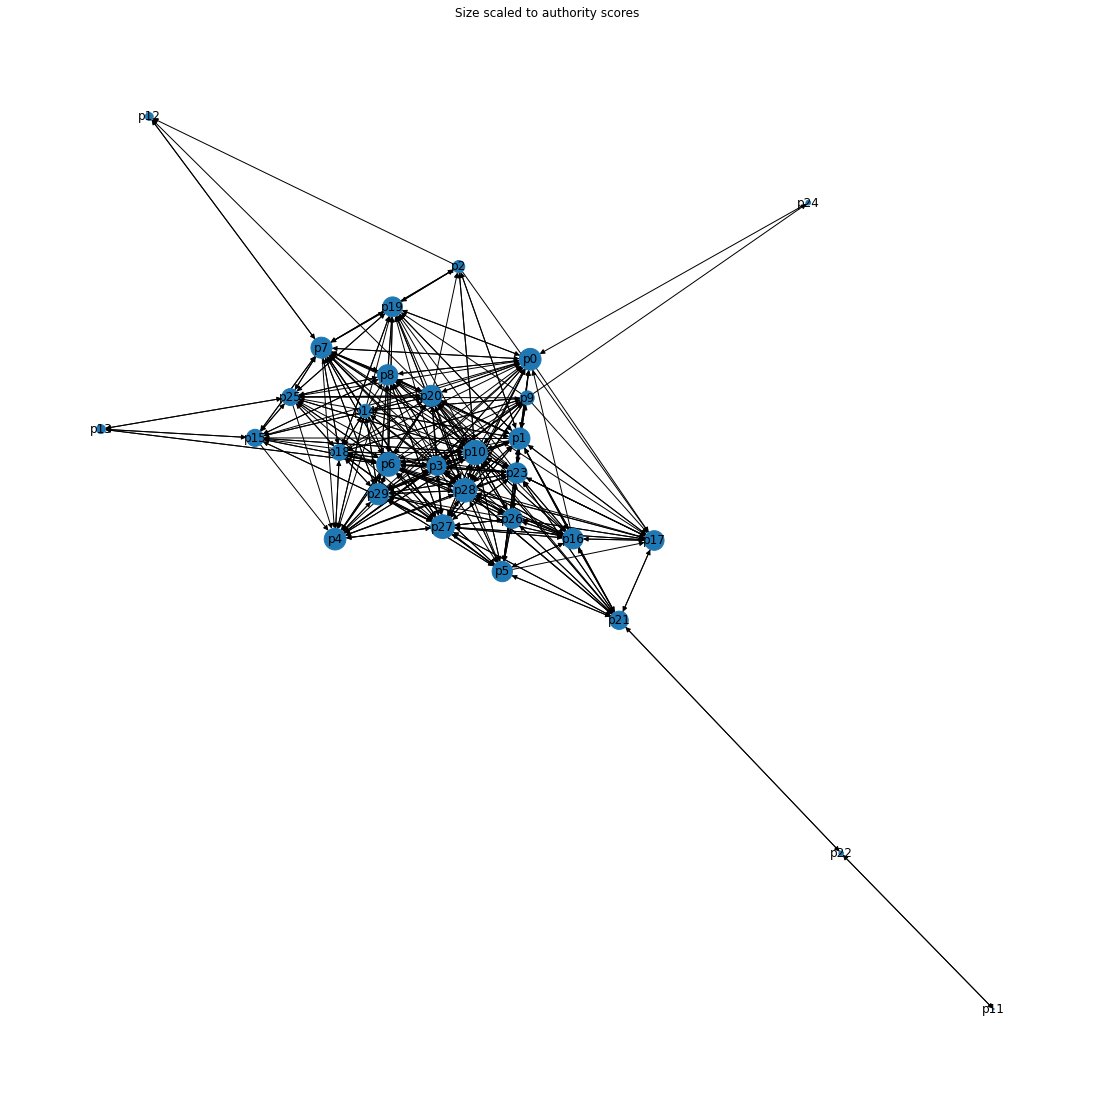

In [13]:
pp.pprint(hits[1])

# pos = nx.spring_layout(DG)

size = [value * 10000 for value in hits[1].values()]

nx.draw(DG, pos, with_labels= True, node_size = size)
plt.title("Size scaled to authority scores")
plt.show()

Edinburgh Experiences


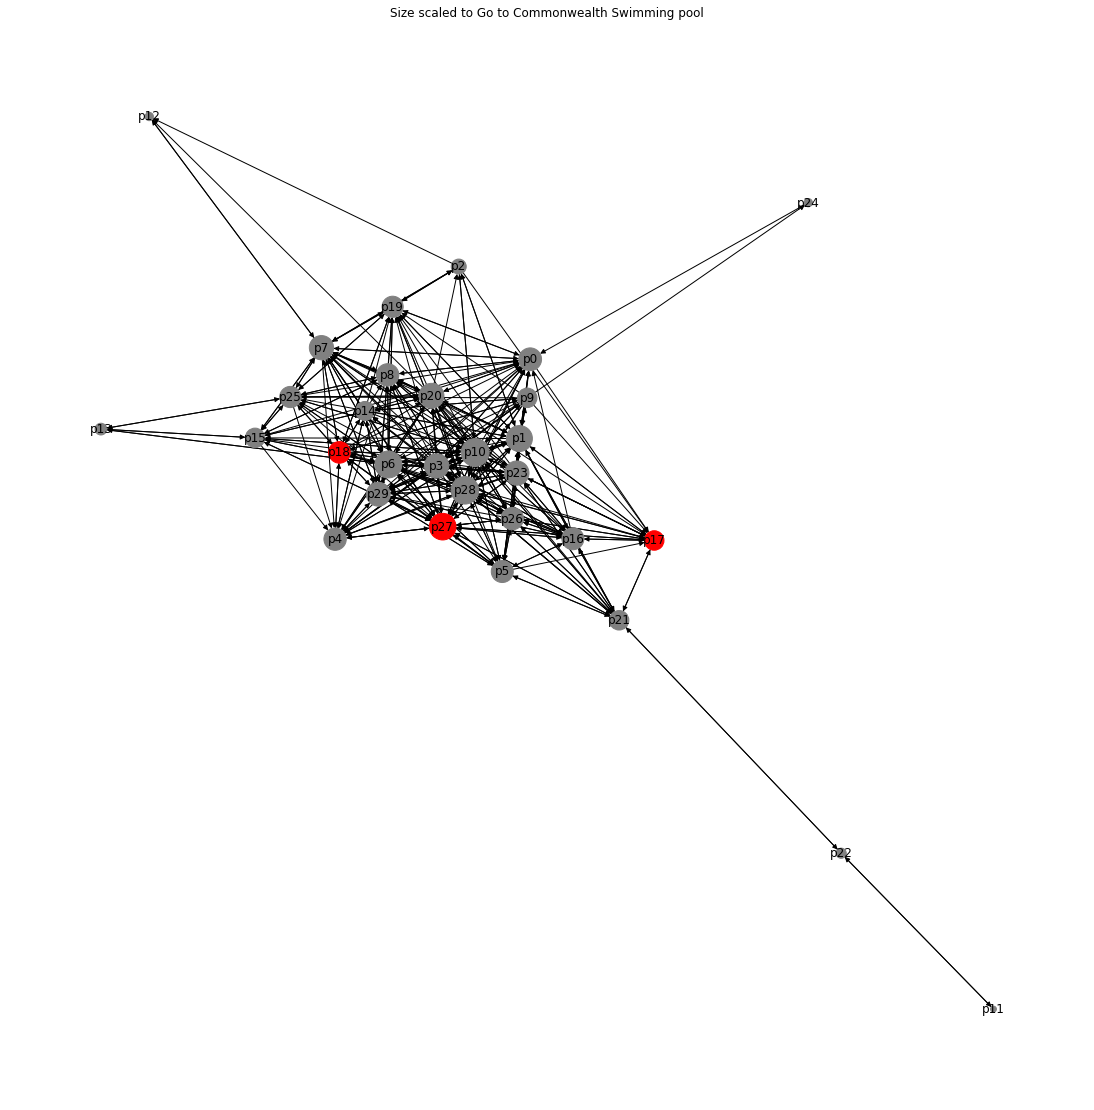

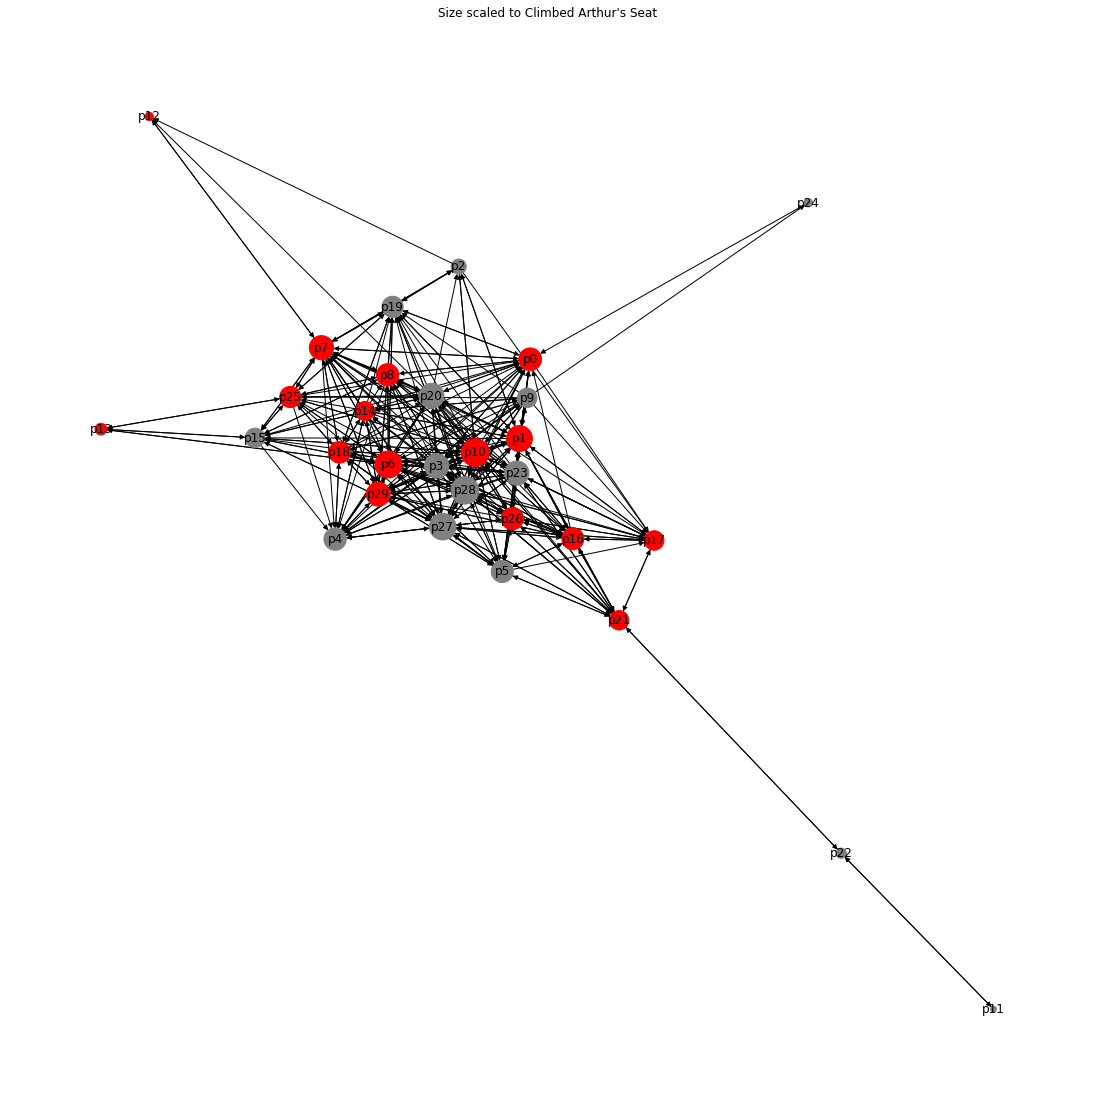

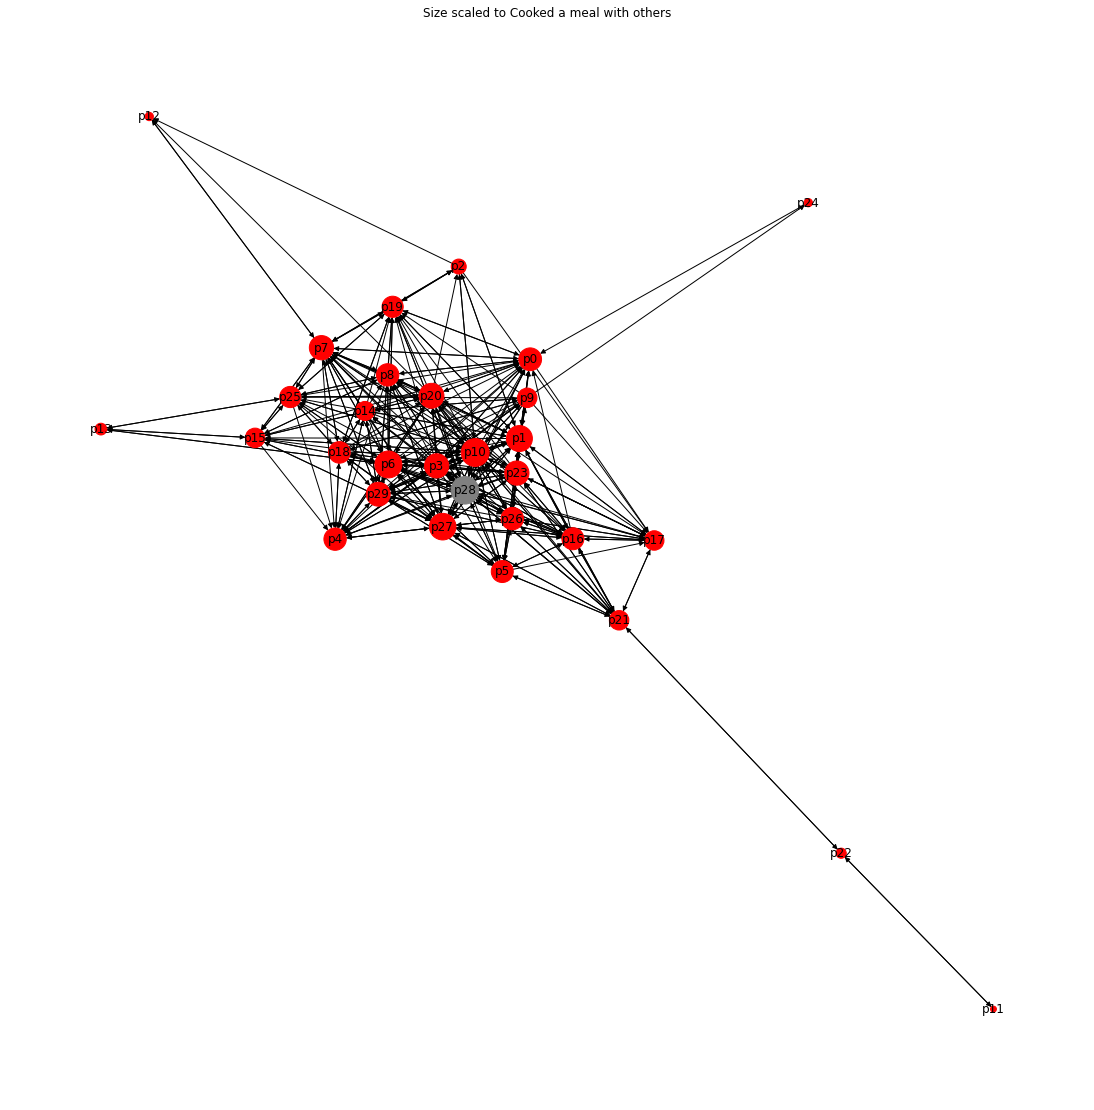

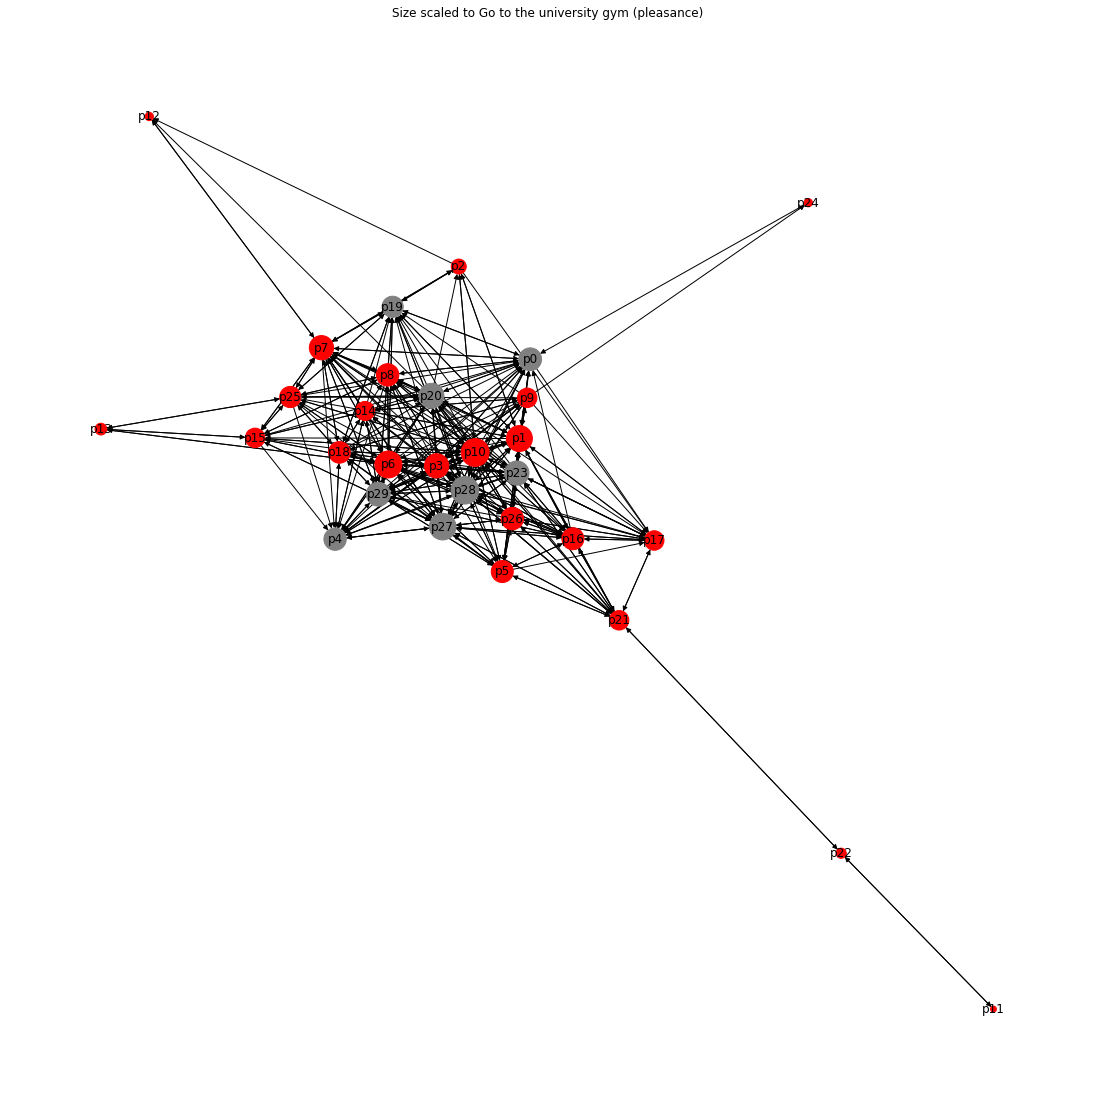

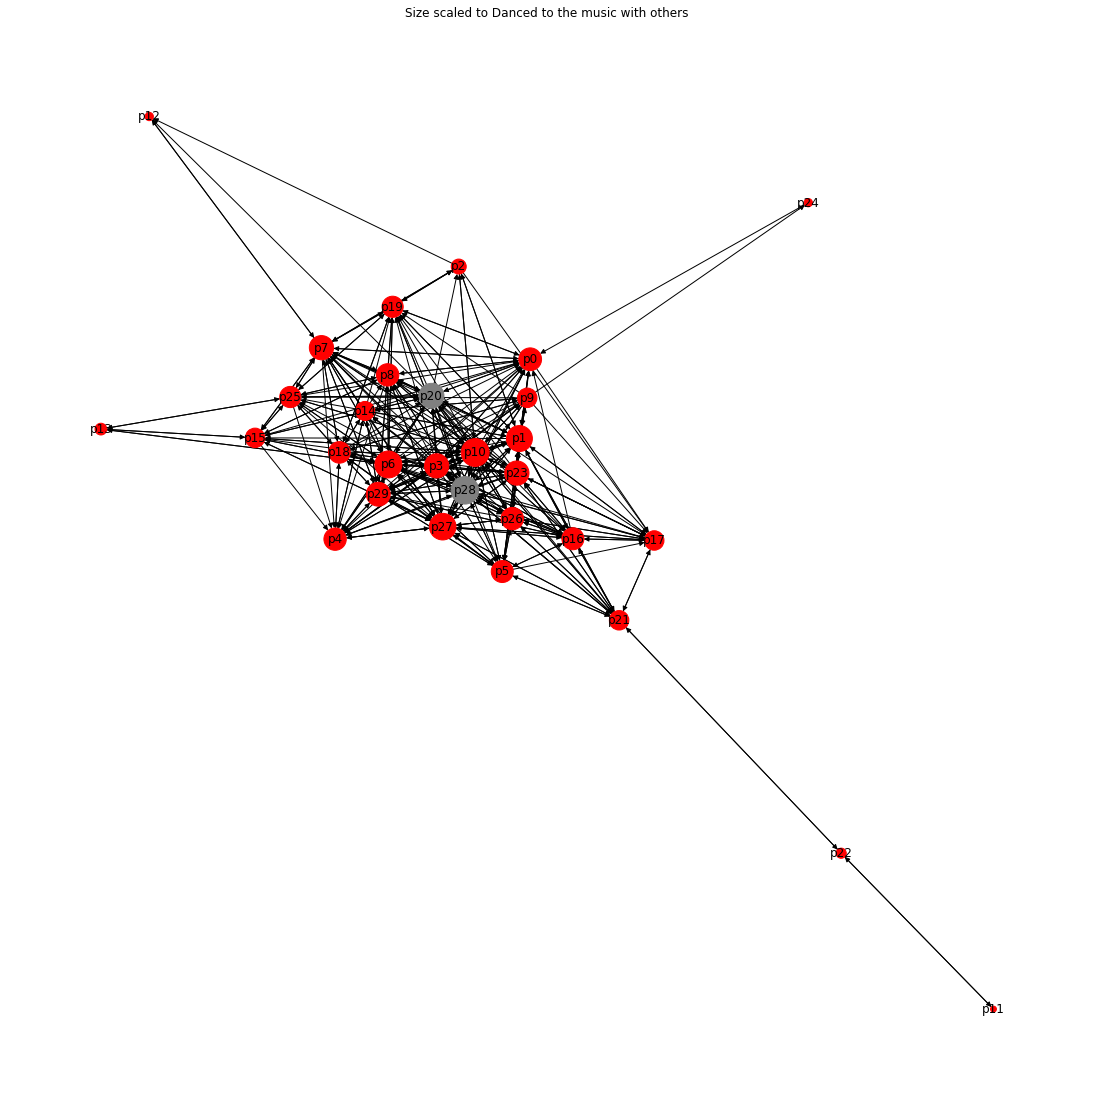

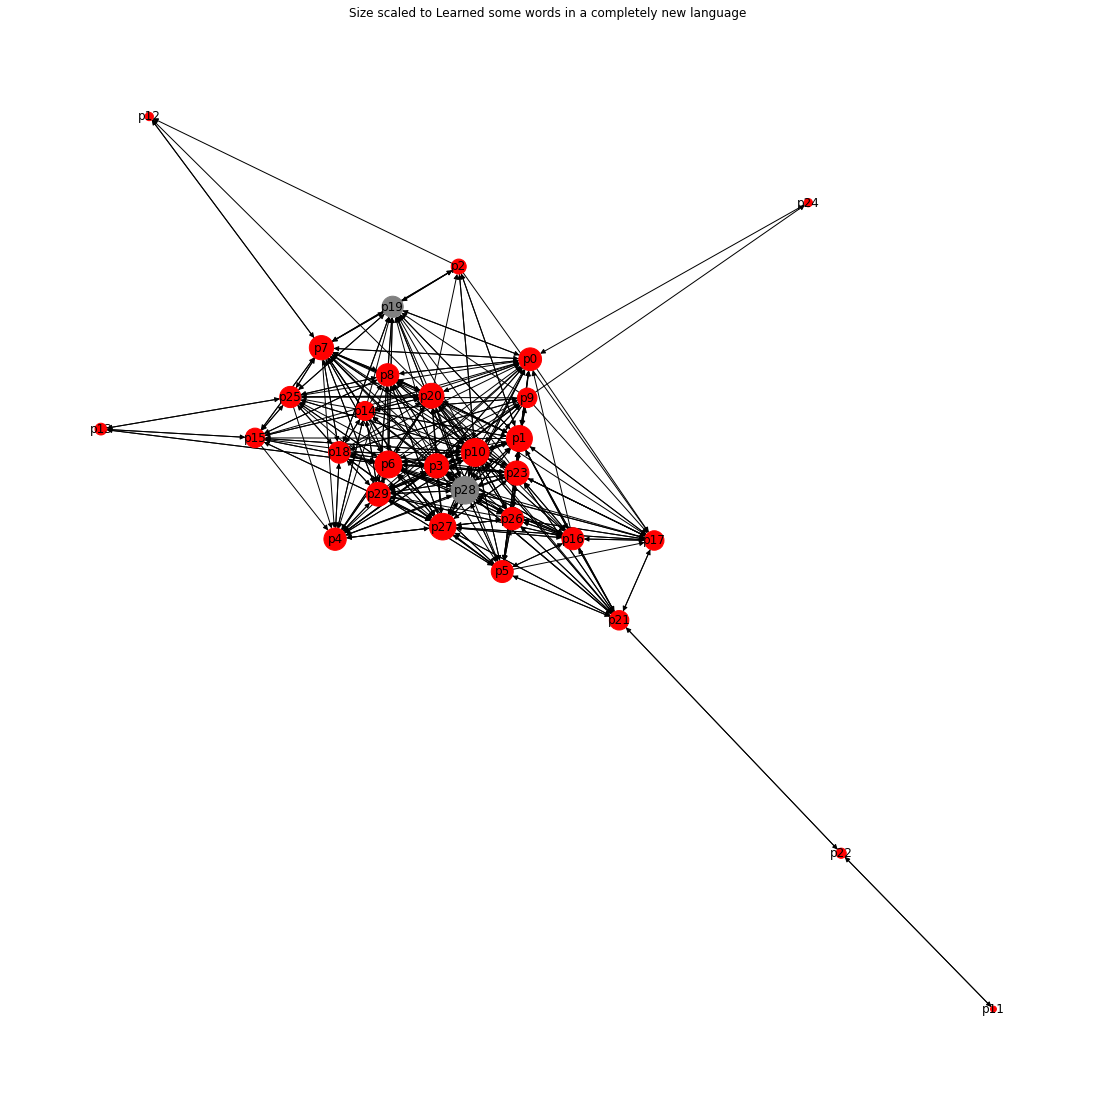

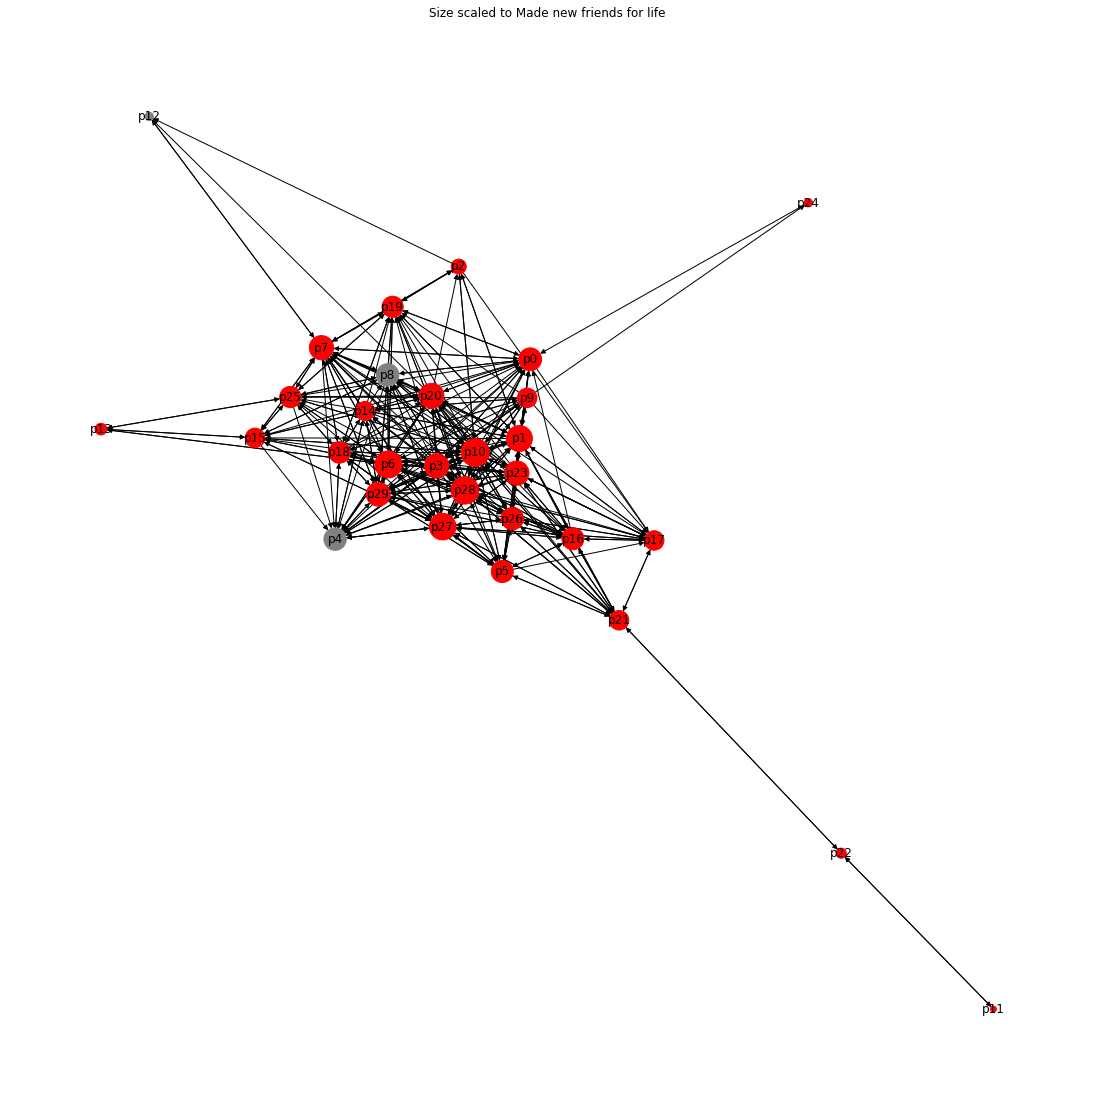

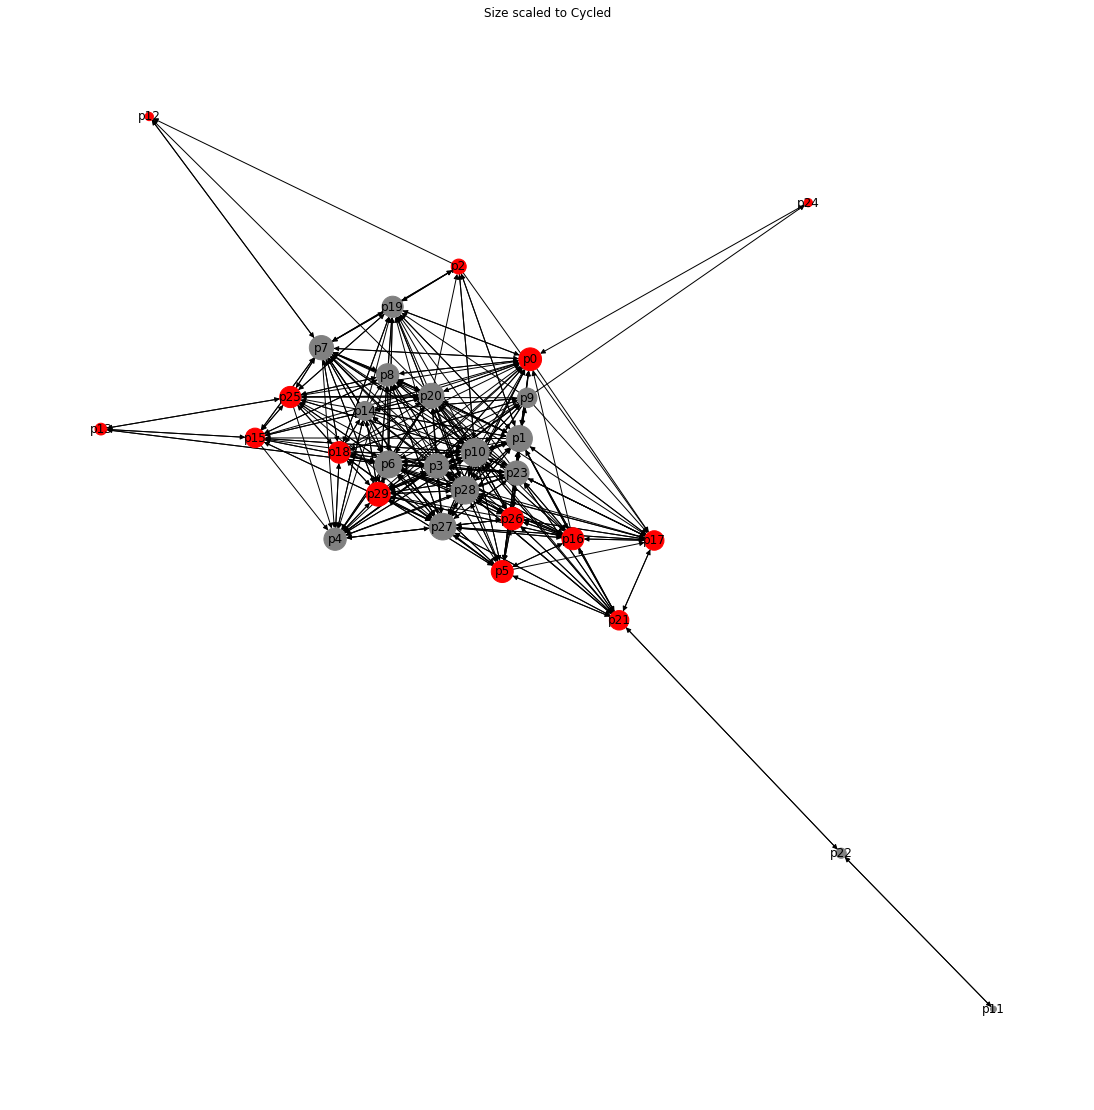

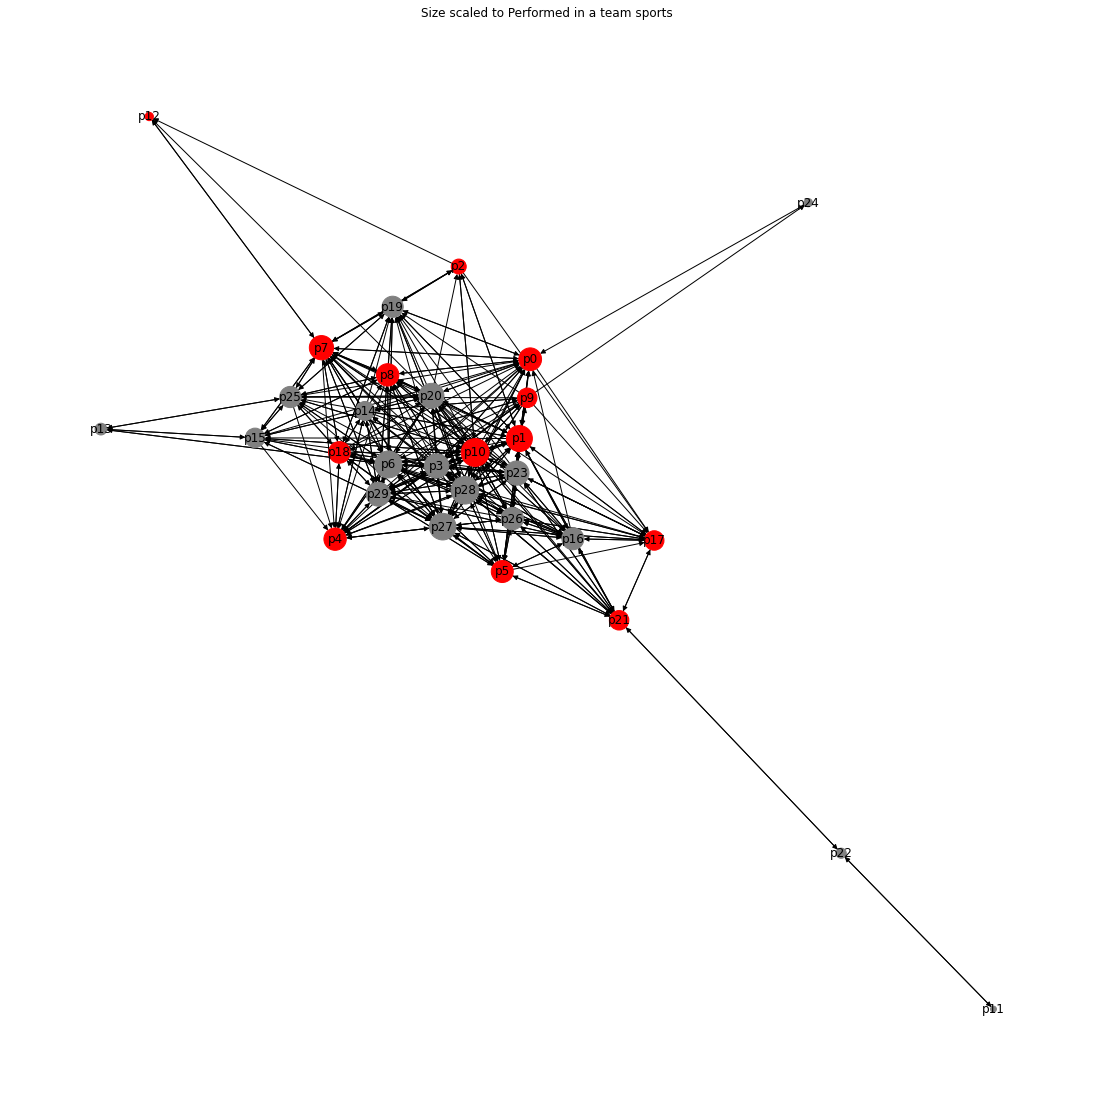

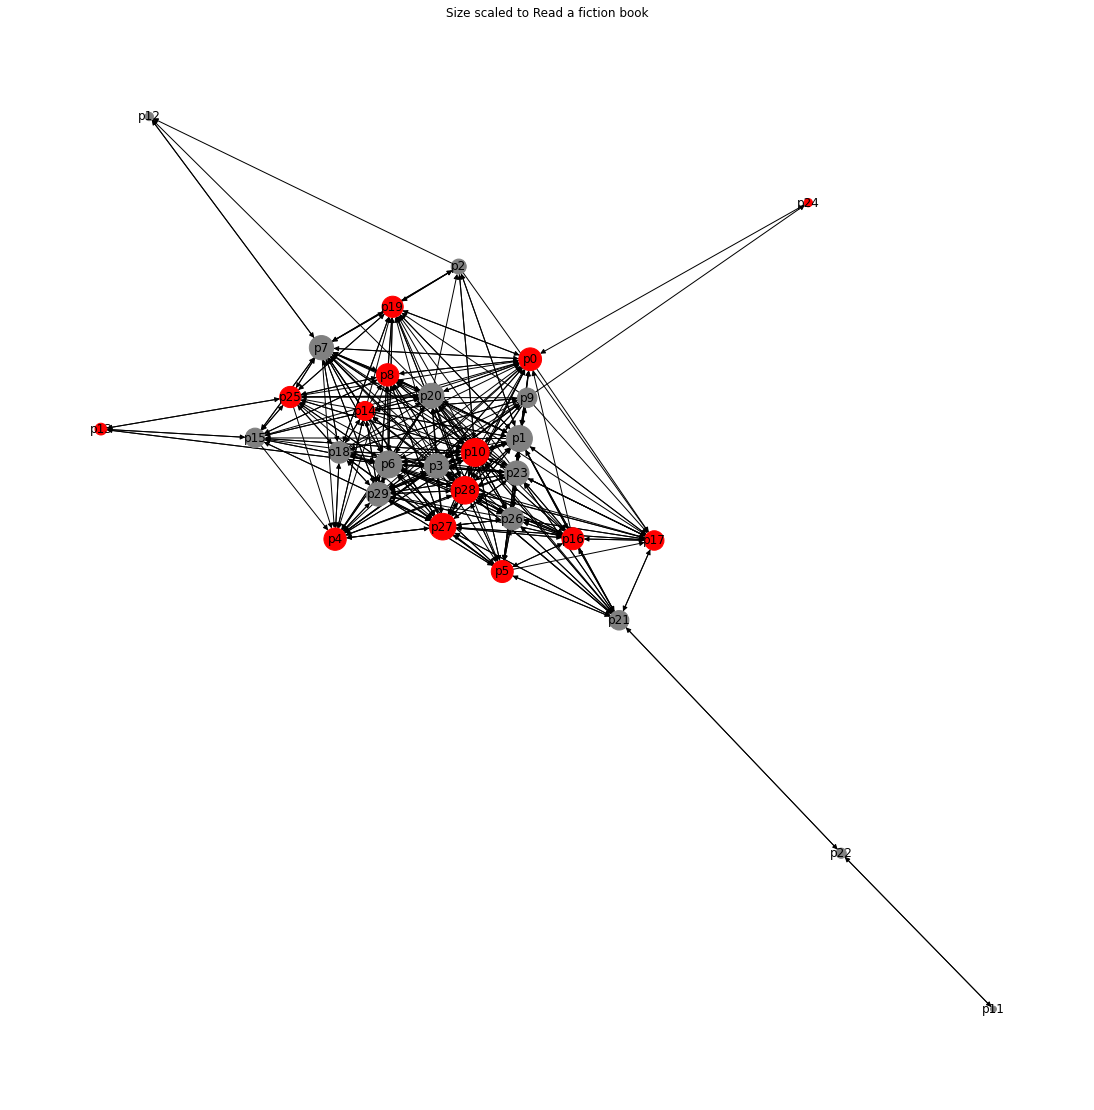

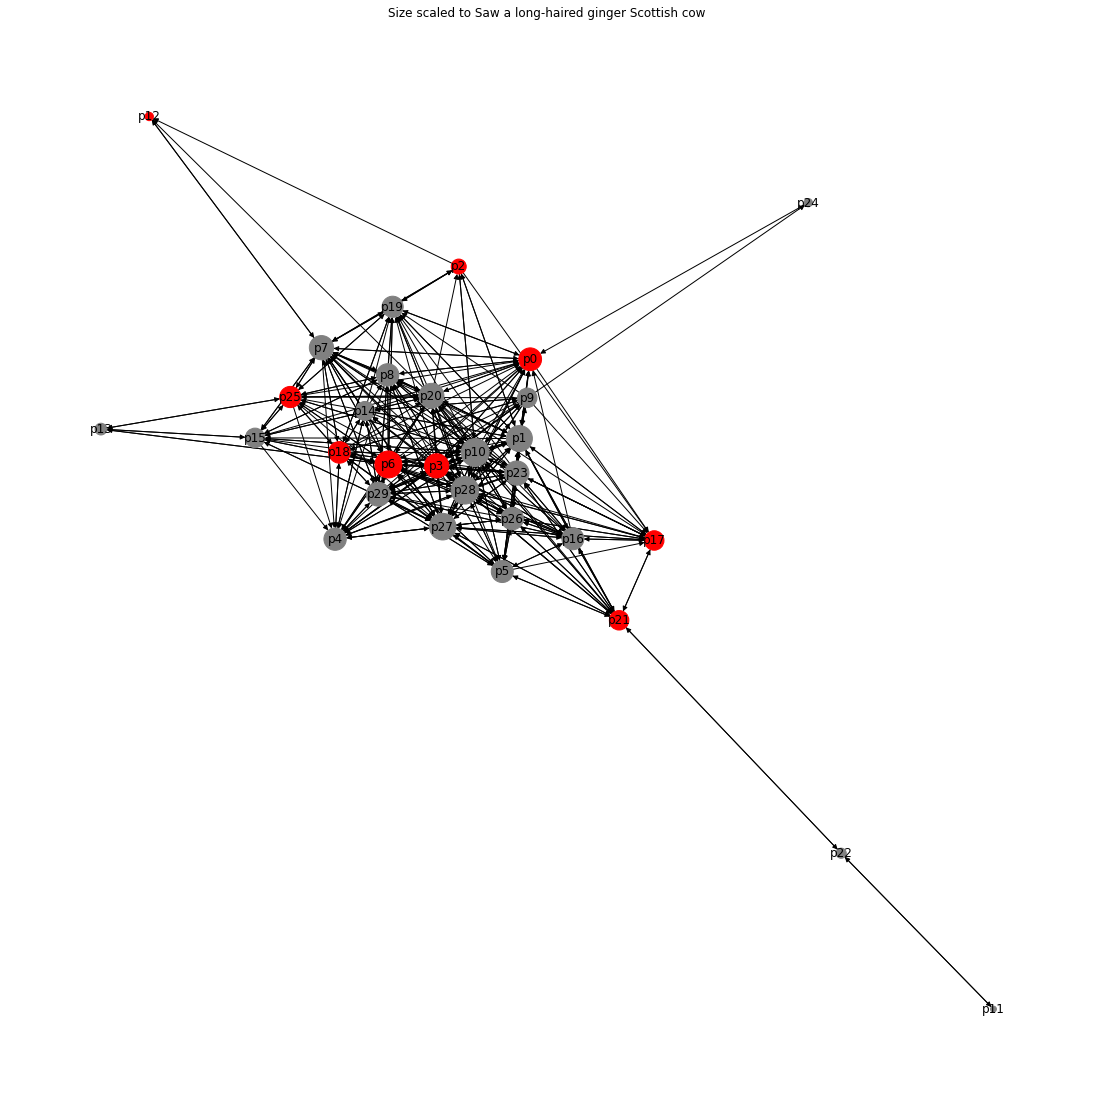

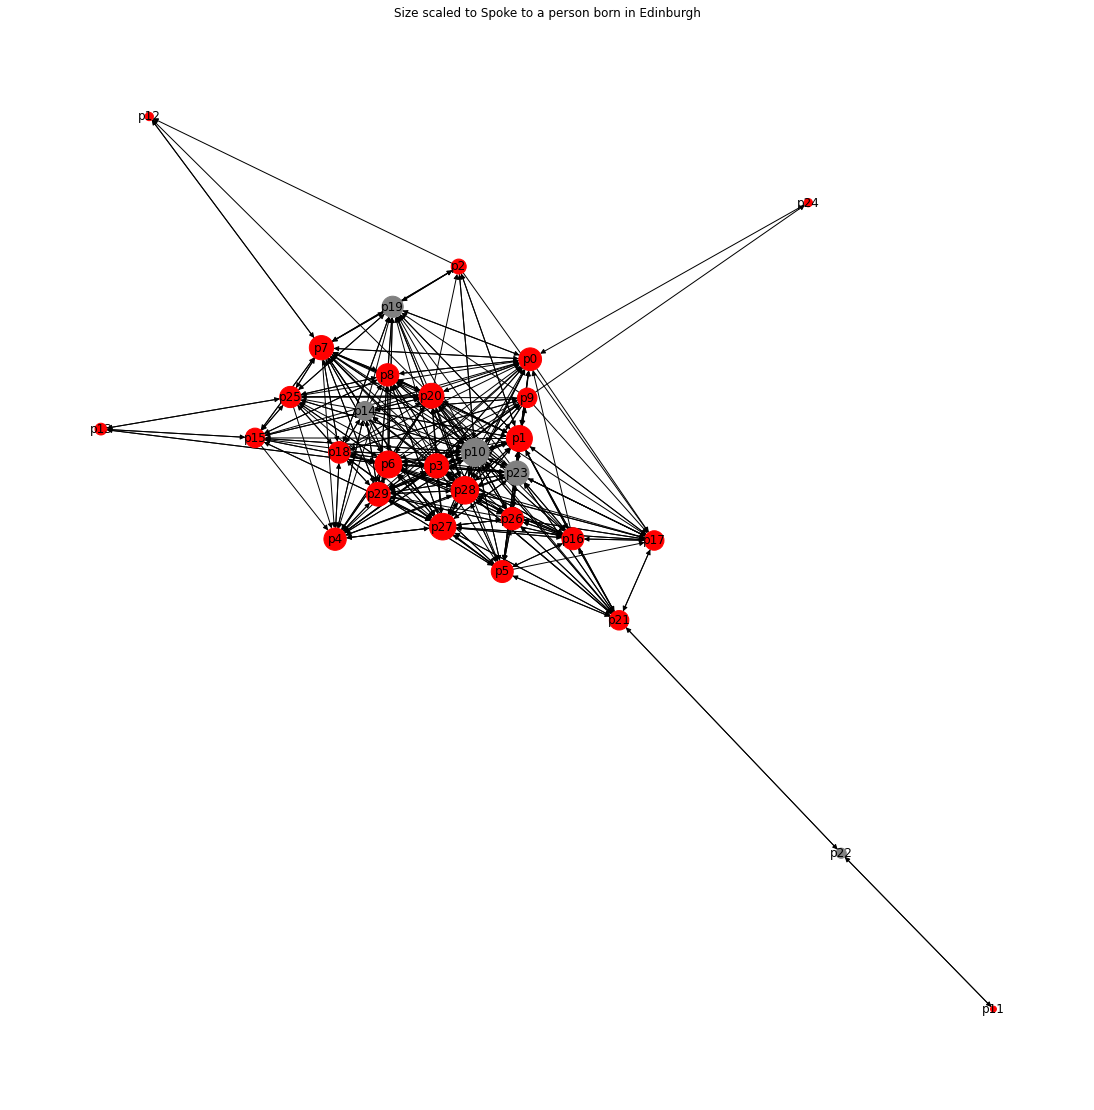

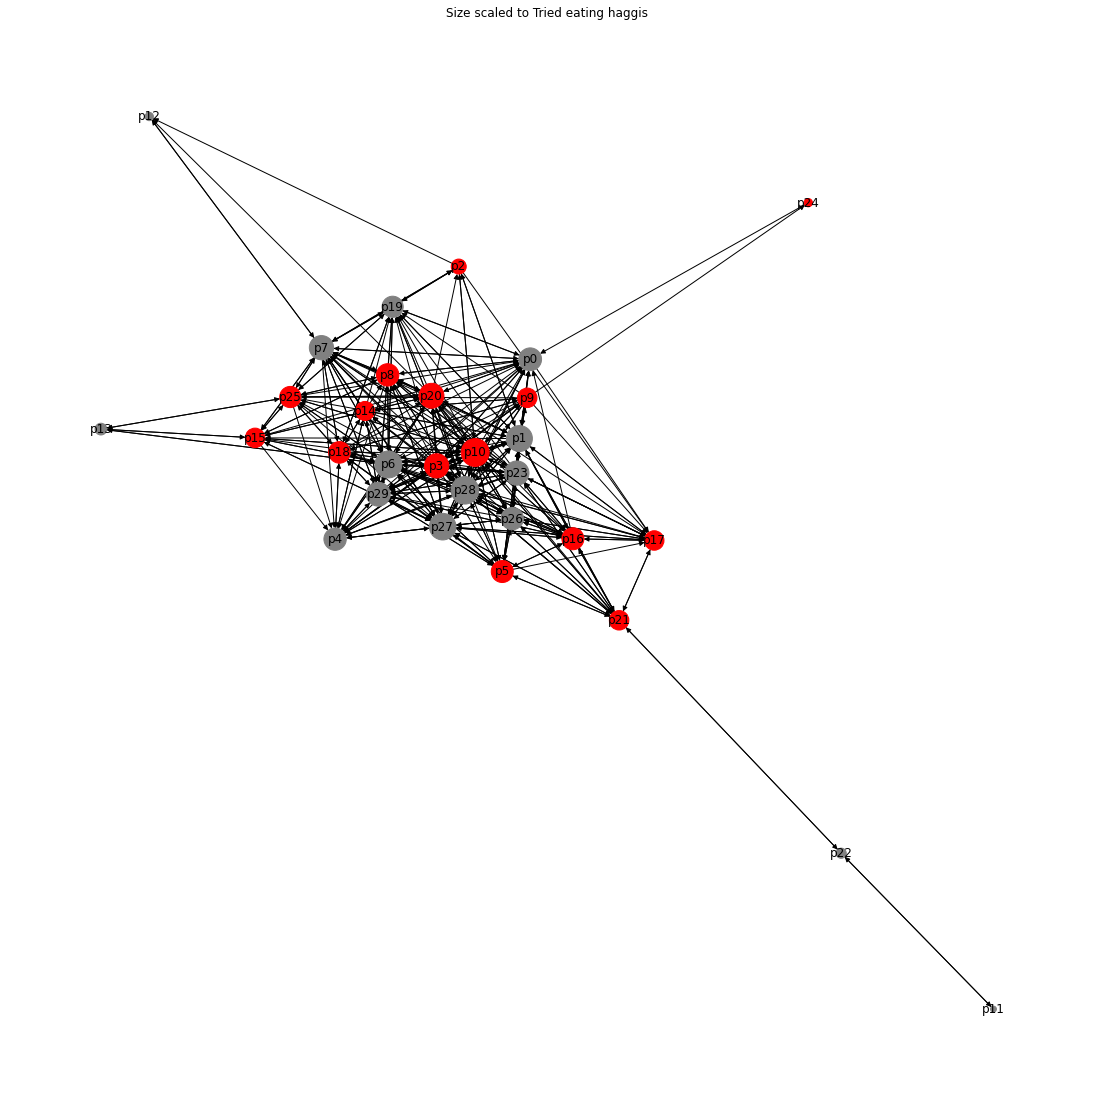

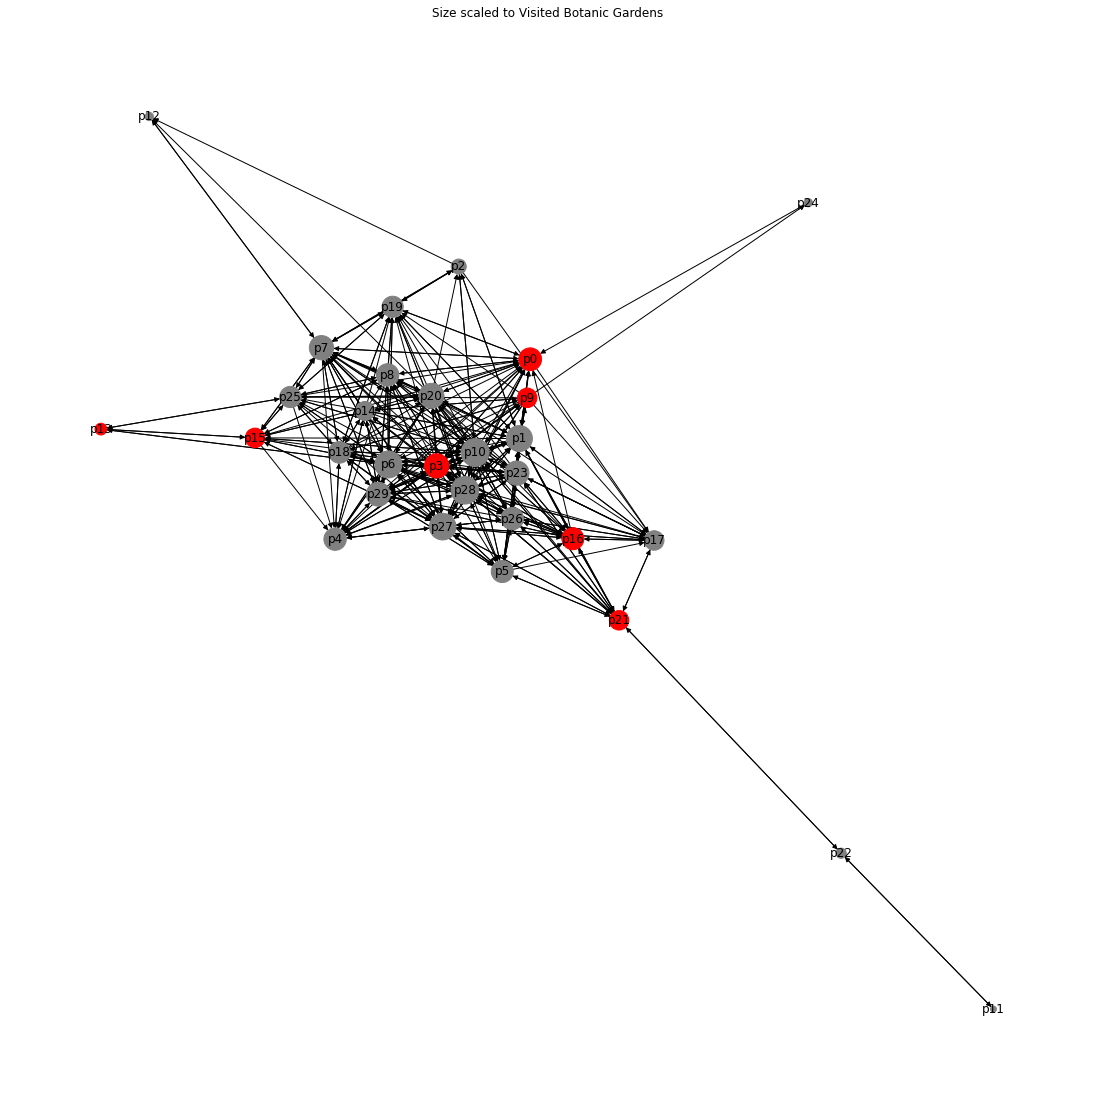

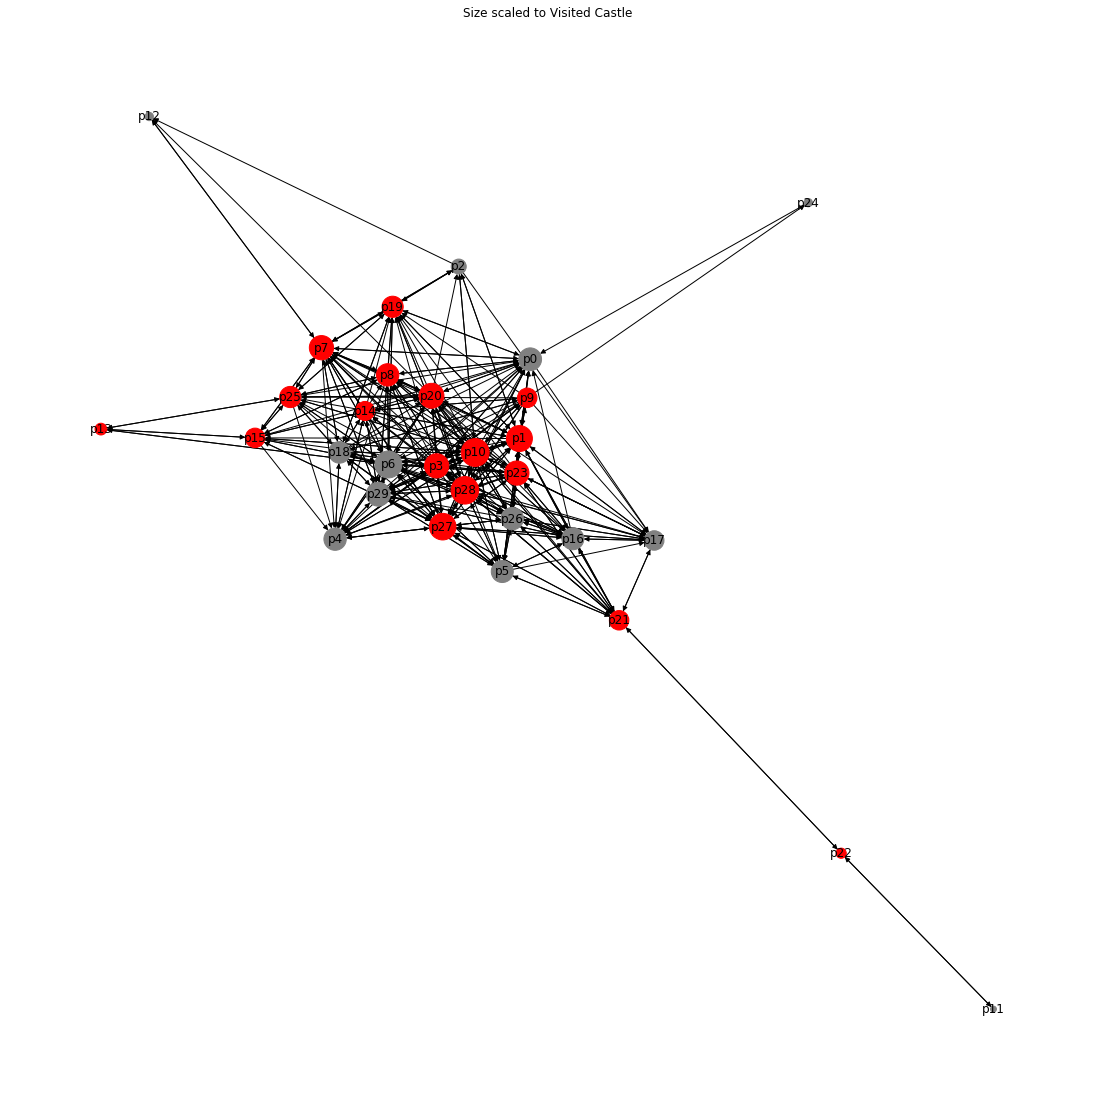

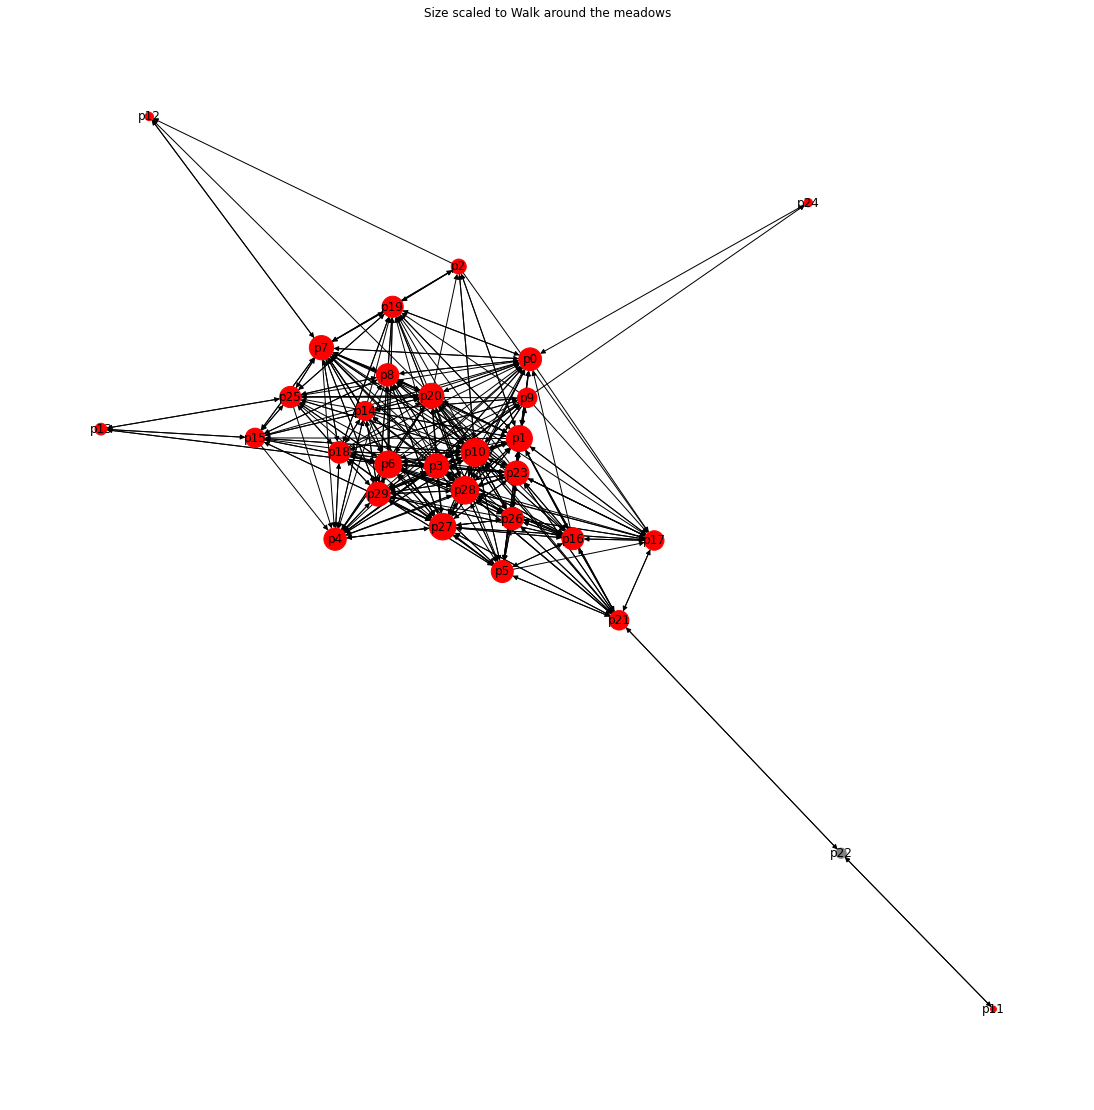

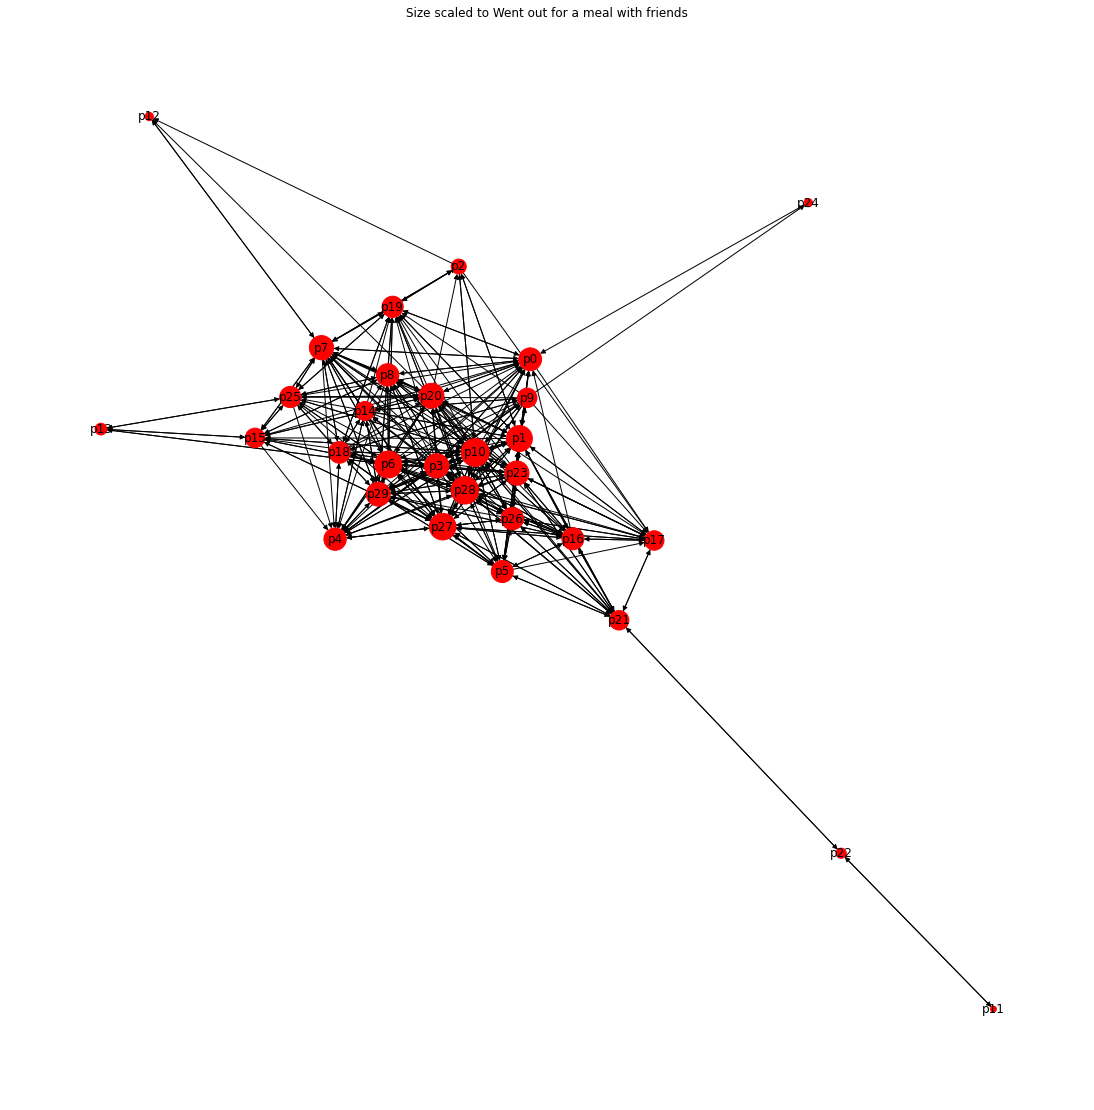

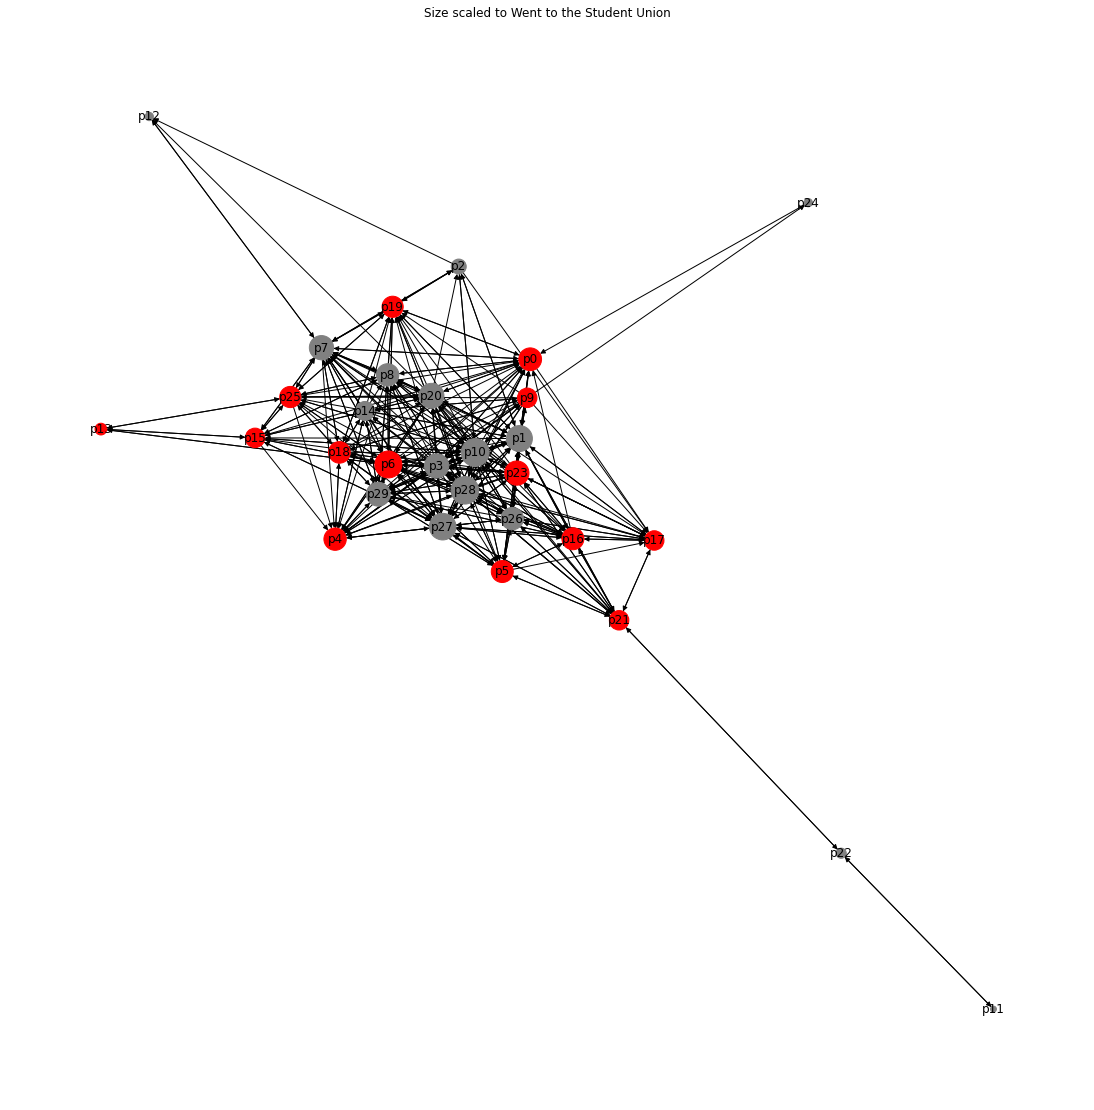

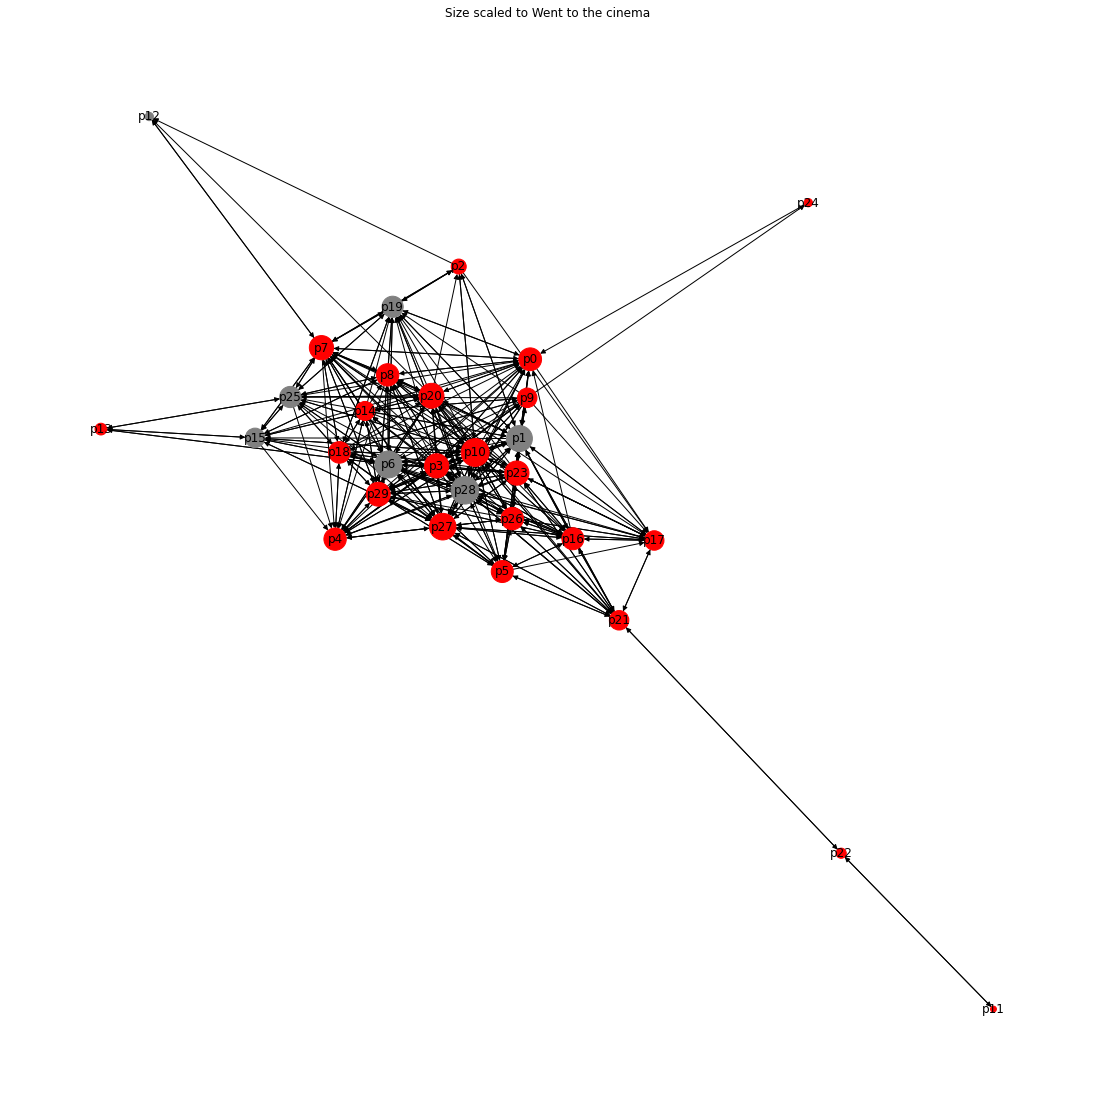

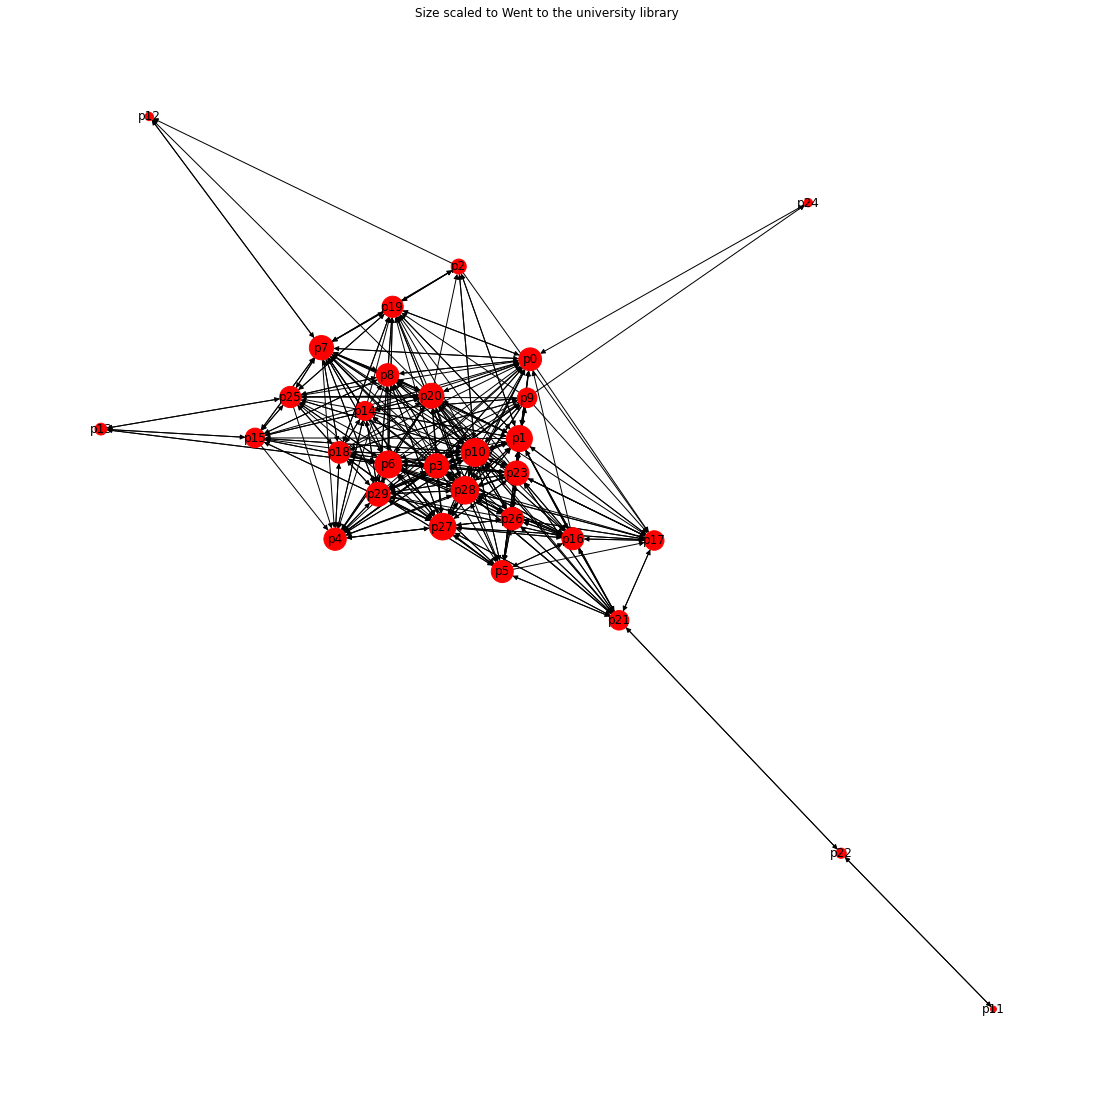

In [14]:
# this cell will take a long time to render.
# if your notebook froze completely, in the menu you can Kernel > Restart

print("Edinburgh Experiences")

# pos = nx.spring_layout(DG)

# experiences_questions personality_questions
size = [value * 500 for value in degree.values()]

for experience in experiences_questions:
    colors =  ['red' if value == 1 else 'grey' for value in df[experience]]
    nx.draw(DG, pos, with_labels= True, node_size = size, node_color = colors)
    plt.title(f"Size scaled to {experience}")
    plt.show()

personality


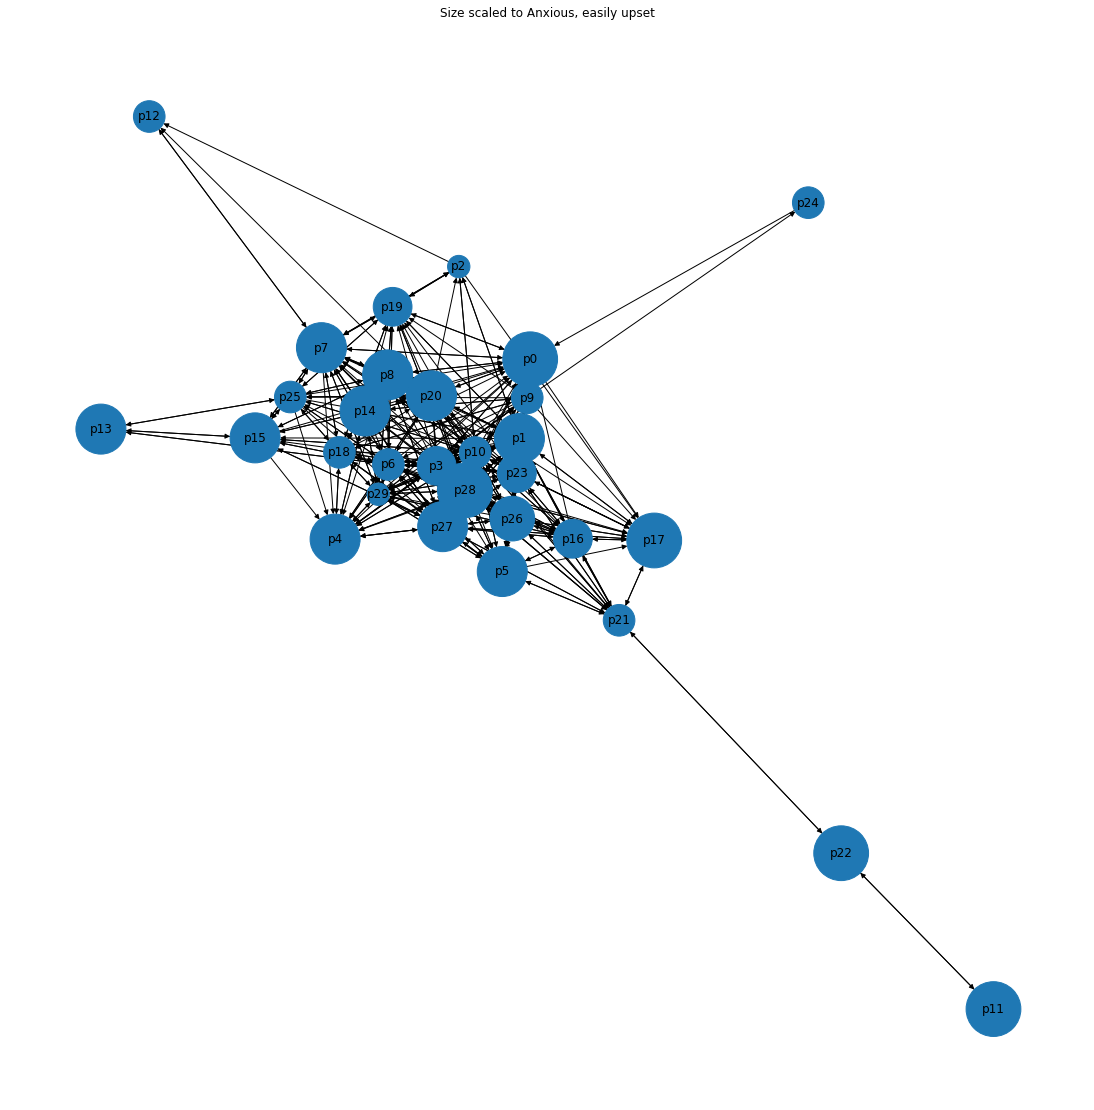

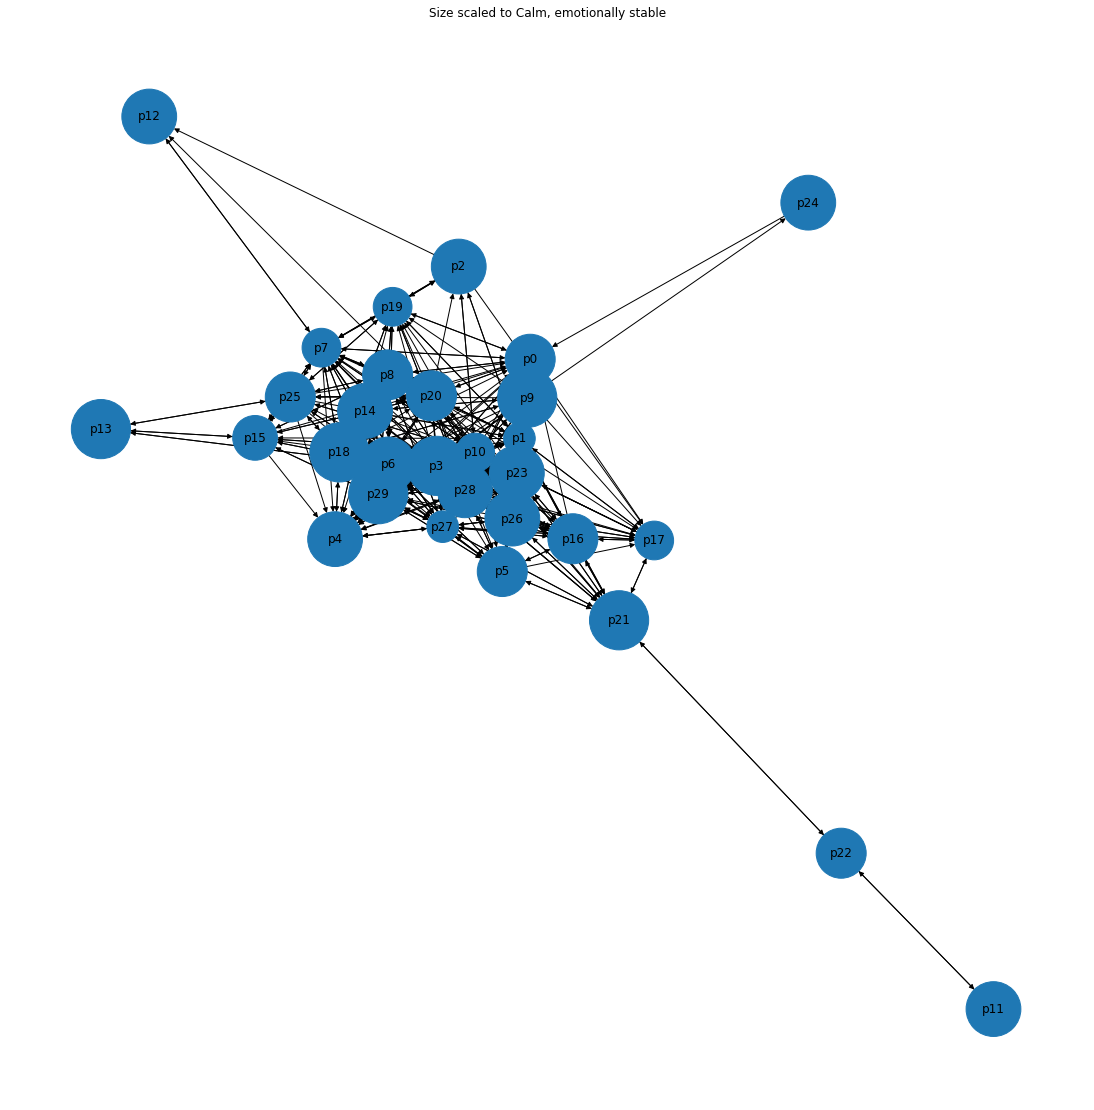

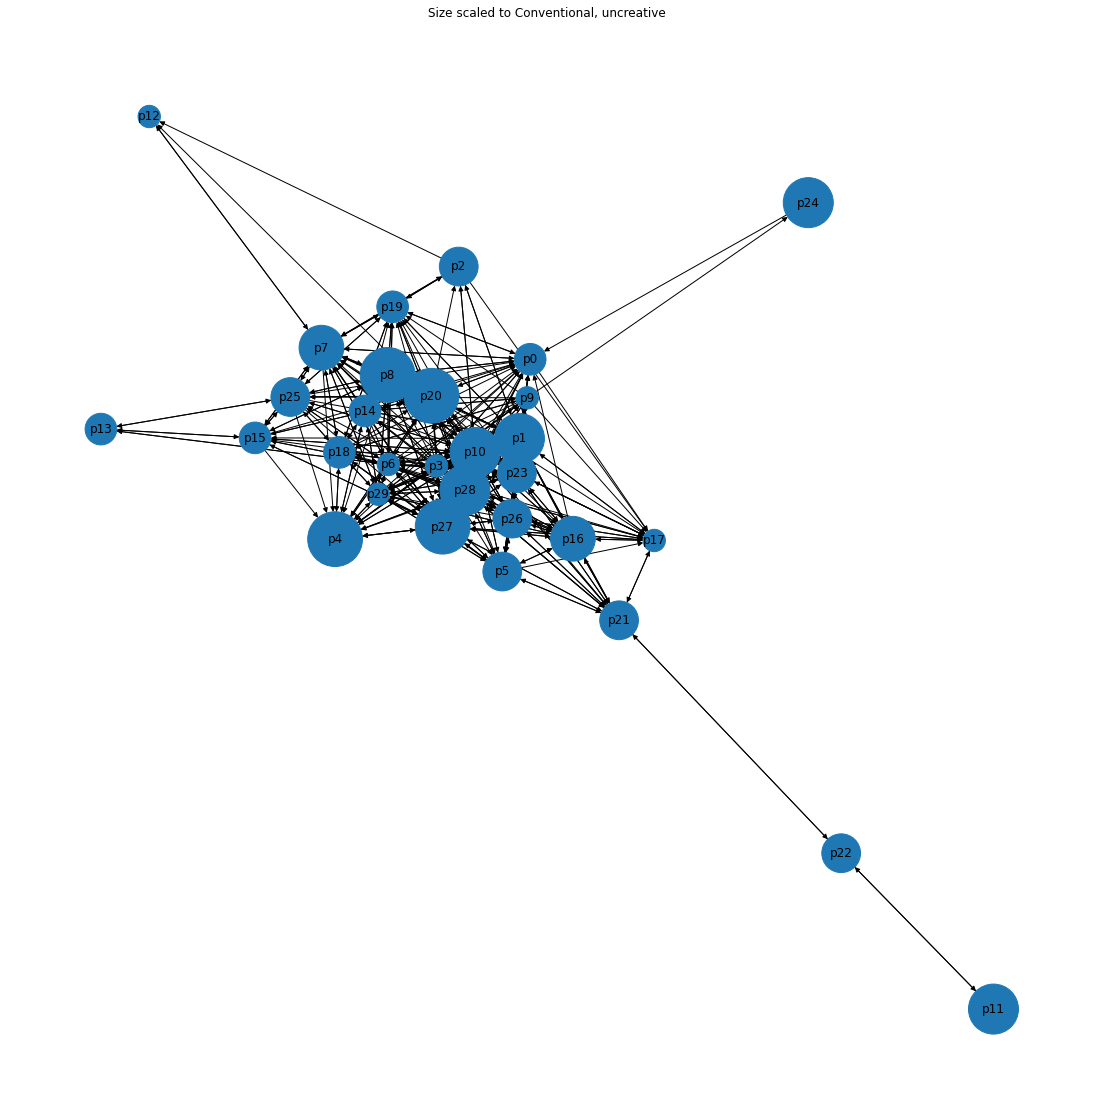

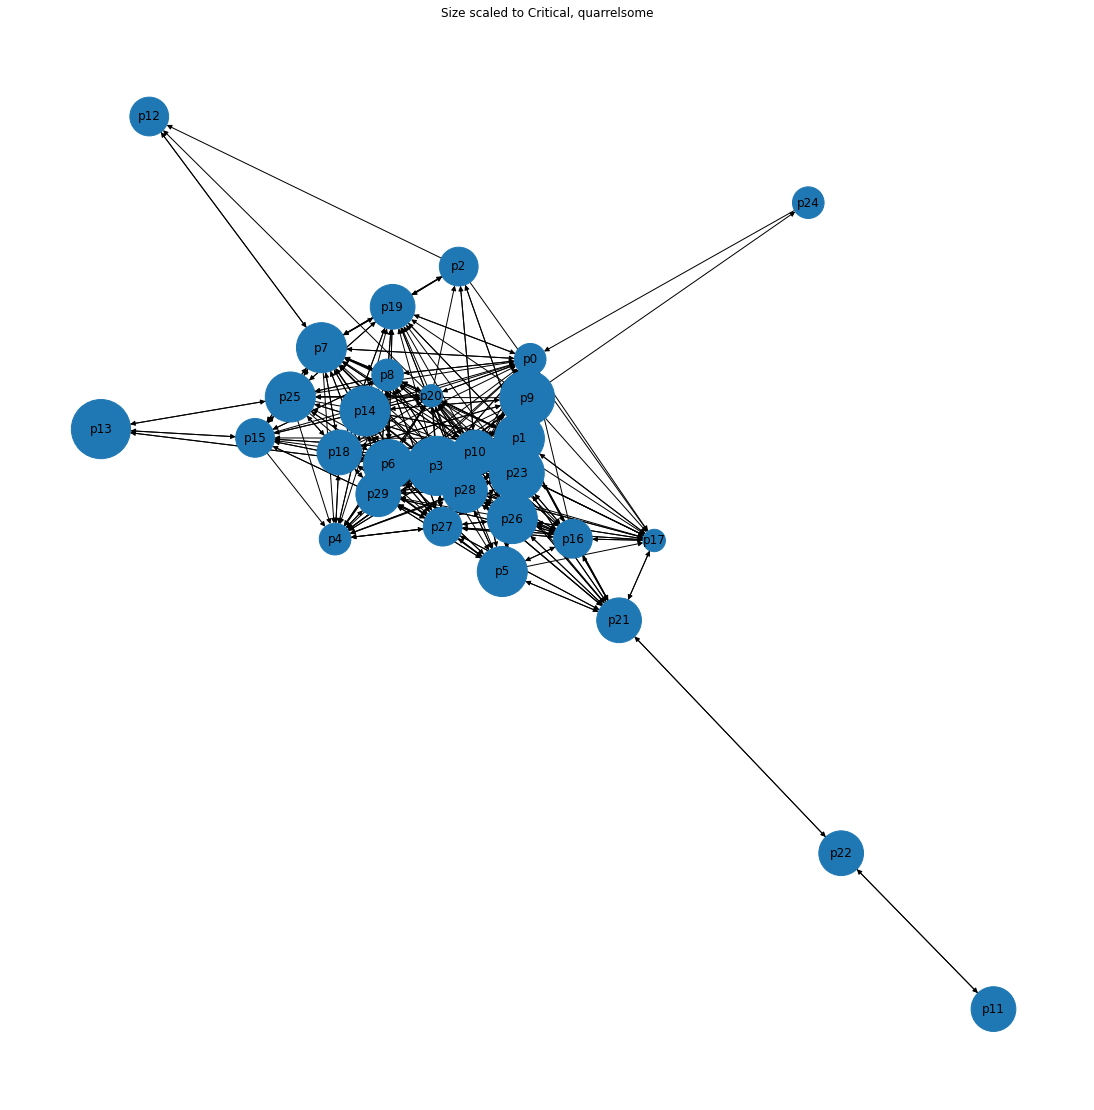

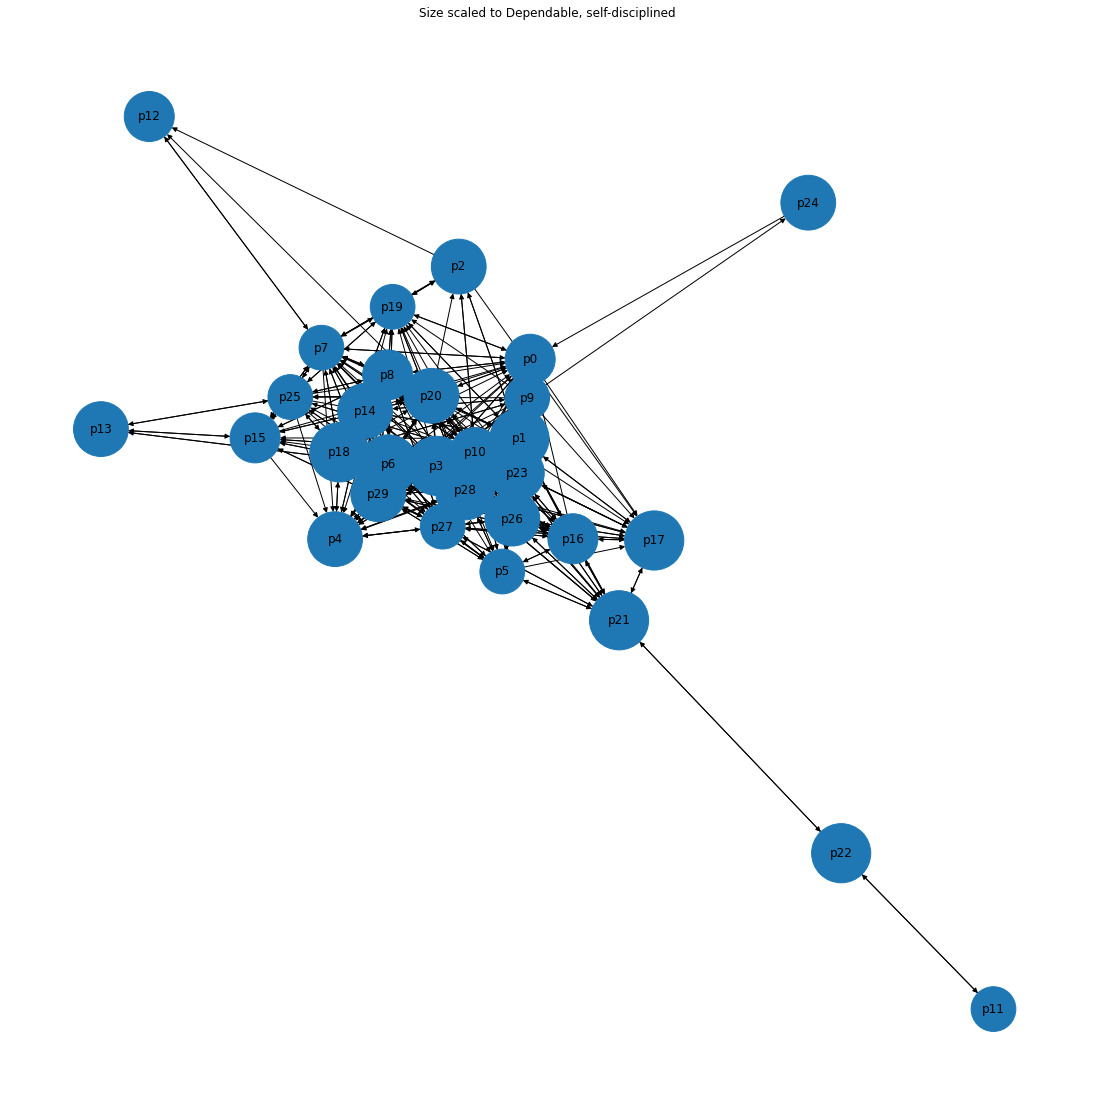

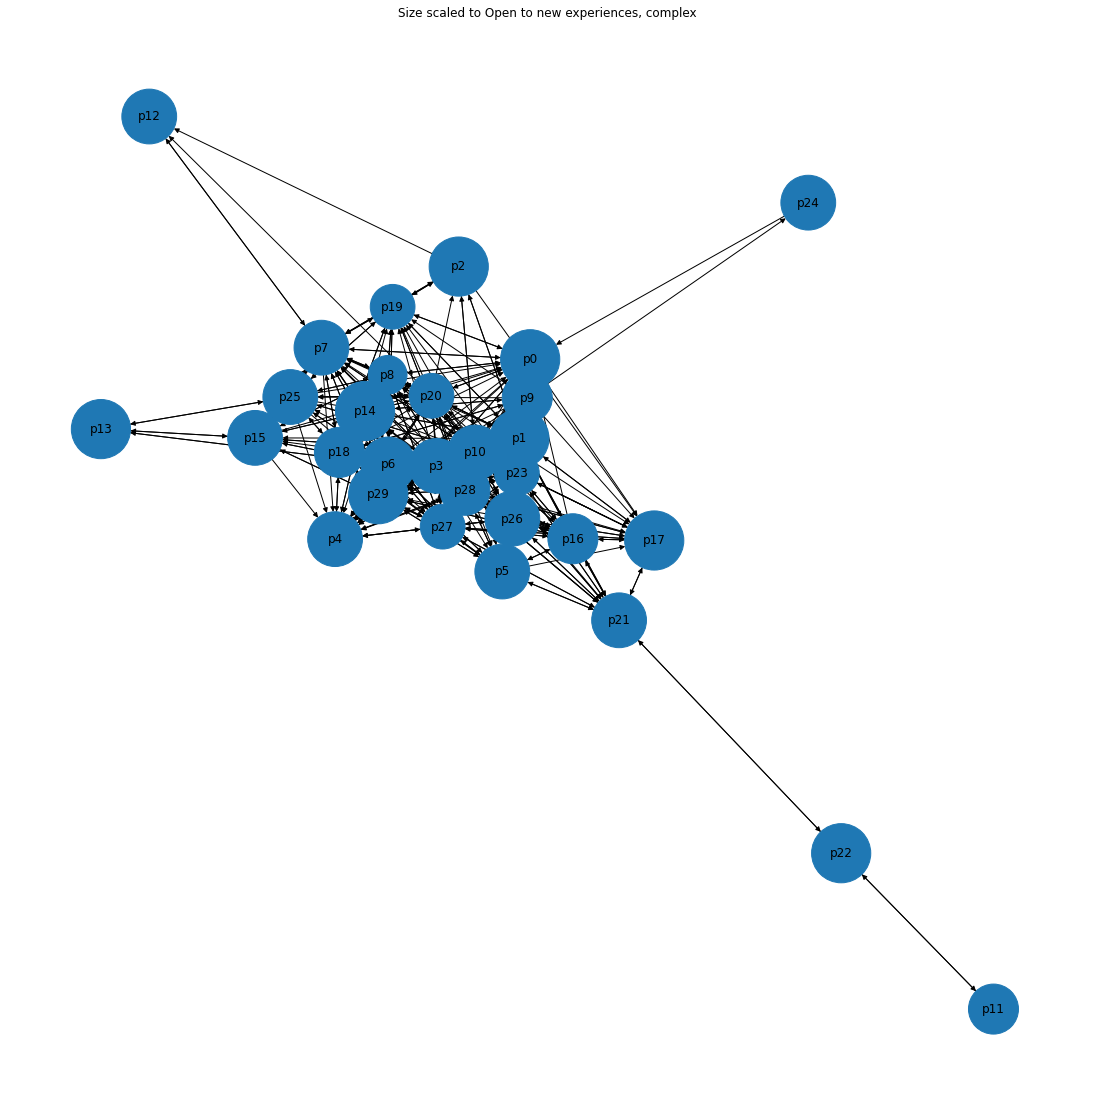

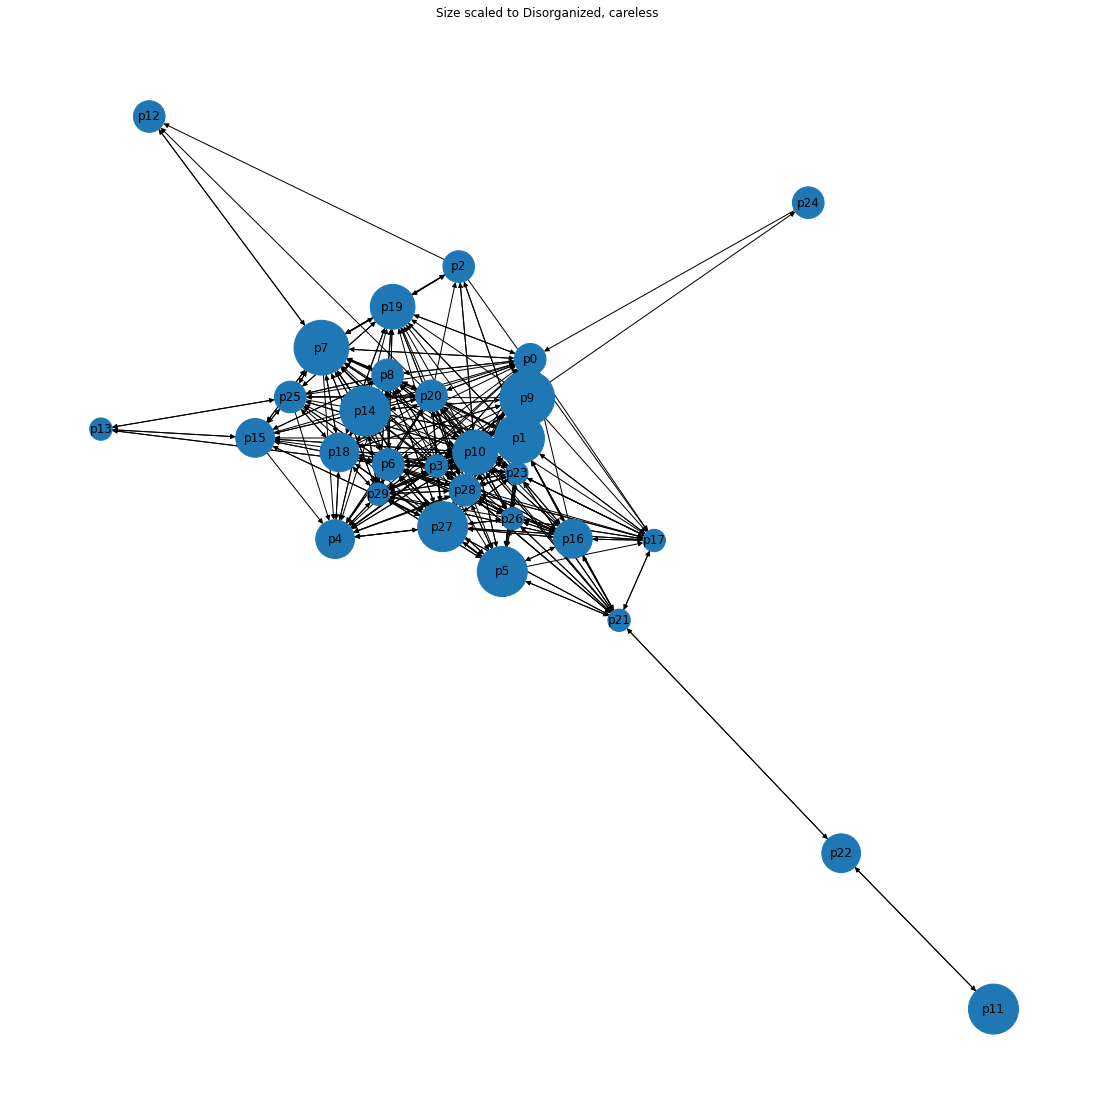

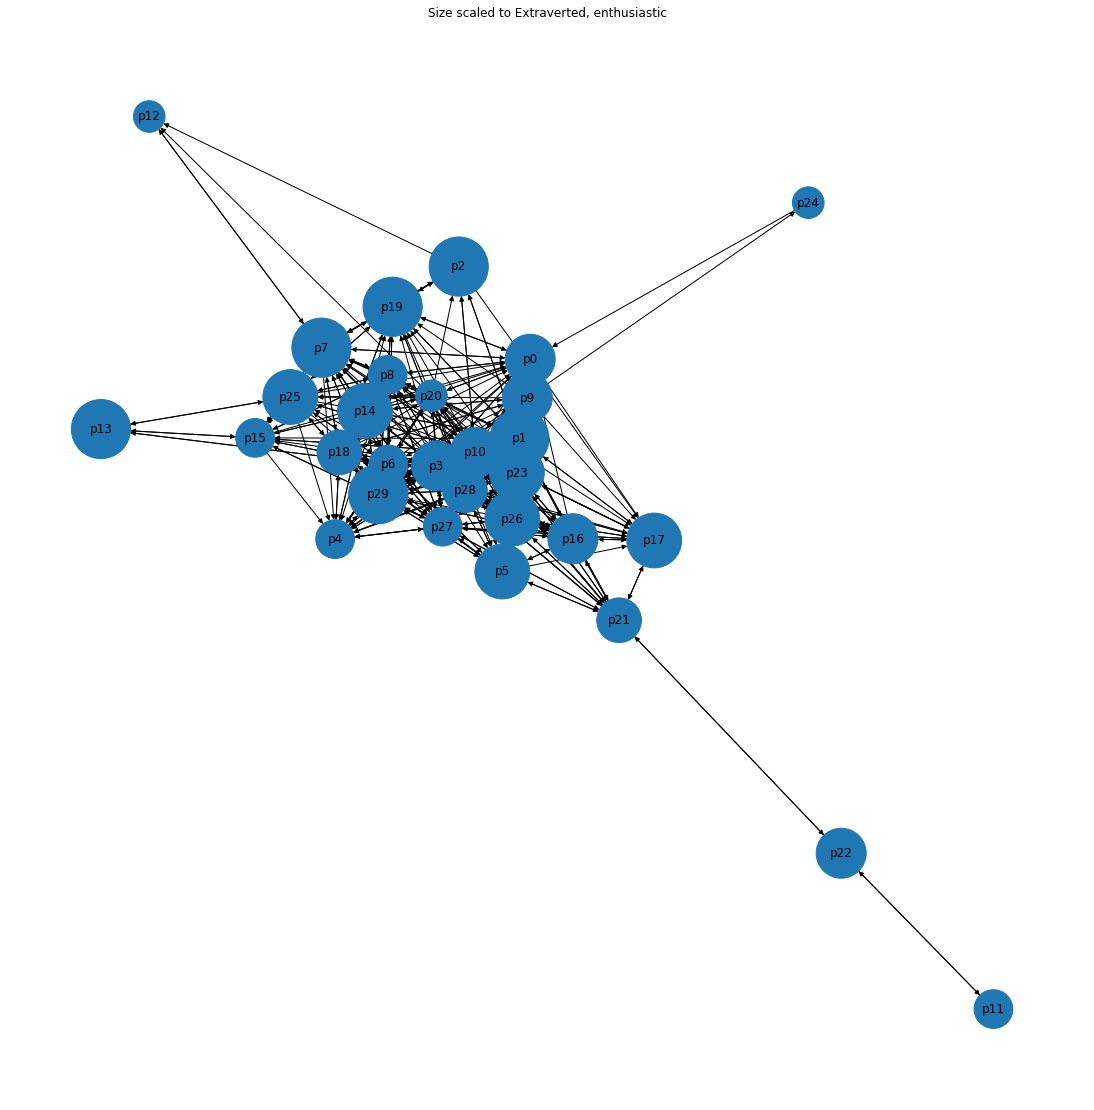

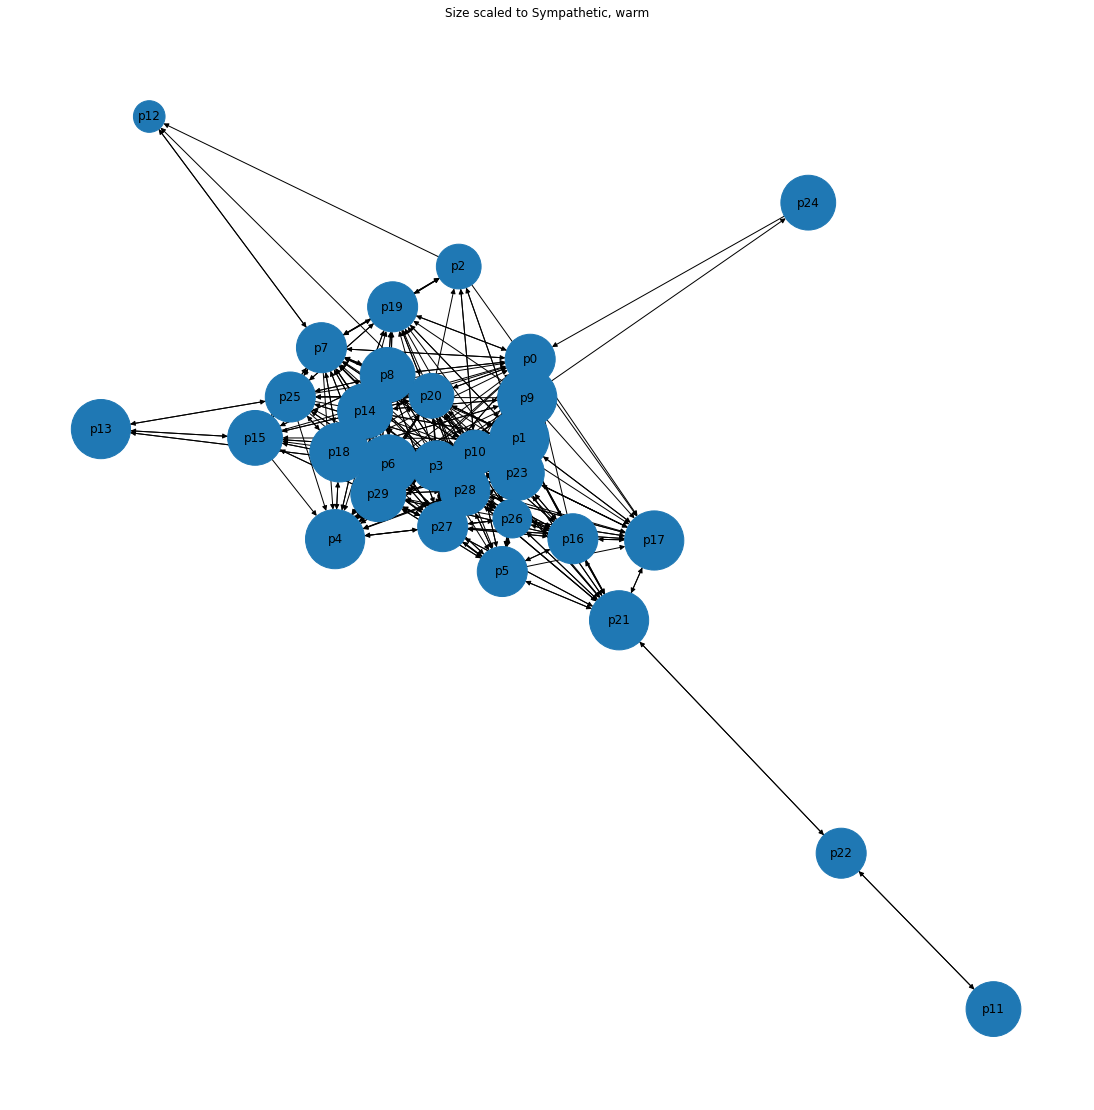

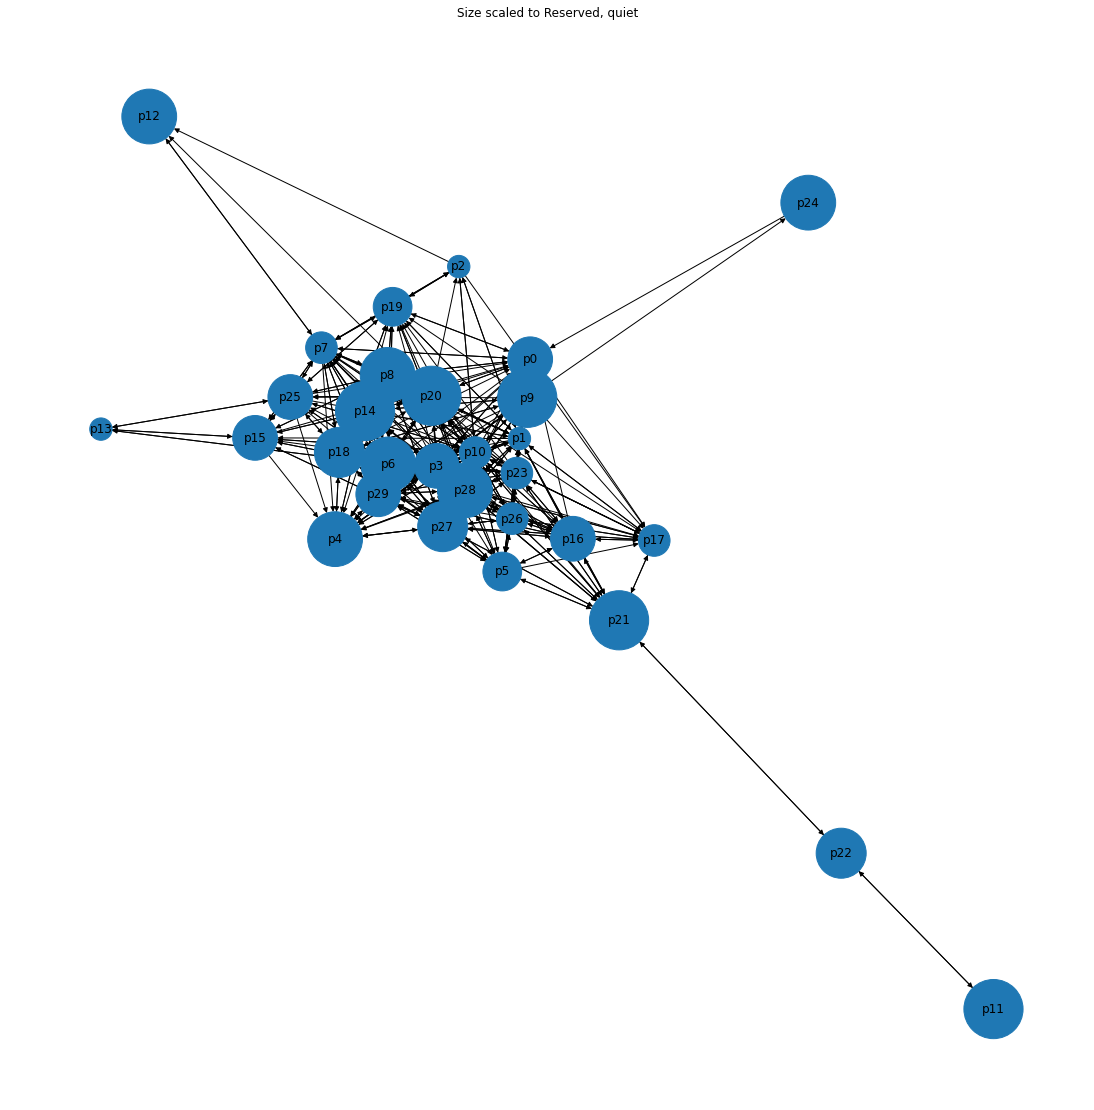

In [15]:
print("personality")

# pos = nx.spring_layout(DG)

for personality in personality_questions:
    size = [value * 500 for value in df[personality]]
    nx.draw(DG, pos, with_labels= True, node_size = size, cmap=plt.cm.Blues)
    plt.title(f"Size scaled to {personality}")
    plt.show()